In [1]:
# Import all the necessary libraries.

from tqdm import tqdm

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import label_binarize
from sklearn.metrics import f1_score, average_precision_score, classification_report, confusion_matrix, accuracy_score, make_scorer

from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import BorderlineSMOTE, ADASYN

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\tomas\anaconda3\lib\site-packages\dask\dataframe\__init__.py:31: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [4]:
# In this case, I will be using the raw dataset with multiple classification (0,1 and 2)
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

In [5]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,253670,253671,253672,253673,253674,253675,253676,253677,253678,253679
Diabetes_012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0
HighBP,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
HighChol,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
CholCheck,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
BMI,40.0,25.0,28.0,27.0,24.0,25.0,30.0,25.0,30.0,24.0,...,25.0,23.0,30.0,42.0,27.0,45.0,18.0,28.0,23.0,25.0
Smoker,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Stroke,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HeartDiseaseorAttack,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
PhysActivity,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
Fruits,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0


In [6]:
# Let's see if this dataset contains any NaN values.
df.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [7]:
df.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,253680.0,0.297,0.698,0.0,0.0,0.0,0.0,2.0
HighBP,253680.0,0.429,0.495,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424,0.494,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.963,0.190,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382,6.609,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443,0.497,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.041,0.197,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094,0.292,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.757,0.429,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634,0.482,0.0,0.0,1.0,1.0,1.0


In [8]:
# Duplicated rows
df.duplicated().sum()

23899

This dataset seems to be clean. If we read the description we can find that it was previously cleaned. We could delete duplicate rows but as they were not deleted in the previous clean-up it is preferable that we keep them assuming that the data is repeated for different participants.

In [9]:
df.dtypes

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [10]:
# For convenience I will make some modifications in the columns name.
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [11]:
df.columns

Index(['diabetes_012', 'highbp', 'highchol', 'cholcheck', 'bmi', 'smoker',
       'stroke', 'heartdiseaseorattack', 'physactivity', 'fruits', 'veggies',
       'hvyalcoholconsump', 'anyhealthcare', 'nodocbccost', 'genhlth',
       'menthlth', 'physhlth', 'diffwalk', 'sex', 'age', 'education',
       'income'],
      dtype='object')

In [12]:
# We also need to change the format of our target column
df.diabetes_012 = df.diabetes_012.astype(int)

##### EDA (Exploratory Data Analysis)

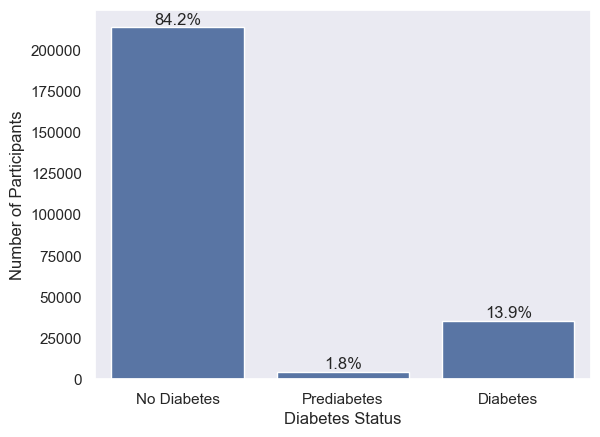

In [226]:
sns.set_theme(style="dark")

ax = sns.countplot(data=df, x='diabetes_012')

for p in ax.patches:
    count = int(p.get_height())
    prop = count / len(df) * 100
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{prop:.1f}%', (x, y), ha='center', va='bottom')

labels = {0: "No Diabetes", 1: "Prediabetes", 2: "Diabetes"}

plt.xticks(
    ticks=[0, 1, 2],
    labels=[labels[i] for i in [0, 1, 2]]
)

plt.xlabel("Diabetes Status")
plt.ylabel("Number of Participants")

plt.show()

We can observe that 84% of our participants do not have diabetes (or only had it during pregnancy), 14% have diabetes and almost 2% have prediabetes. The dataset has a case of imbalance that we need to consider when applying the models.

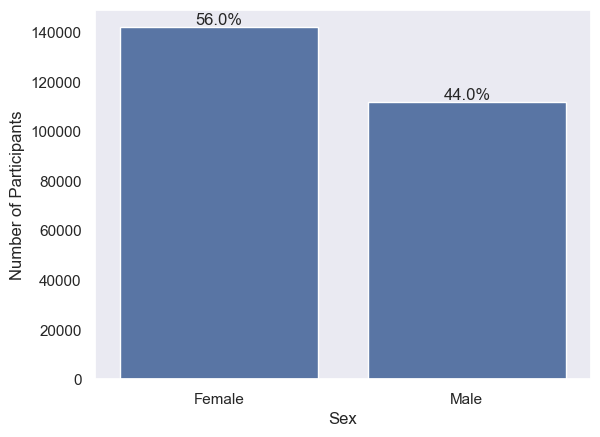

In [201]:
ax = sns.countplot(data=df, x='sex')

for p in ax.patches:
    count = int(p.get_height())
    prop = count / len(df) * 100
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{prop:.1f}%', (x, y), ha='center', va='bottom')

labels = {0: "Female", 1: "Male"}

plt.xticks(
    ticks=[0, 1],
    labels=[labels[i] for i in [0, 1]]
)

plt.xlabel("Sex")
plt.ylabel("Number of Participants")

plt.show()

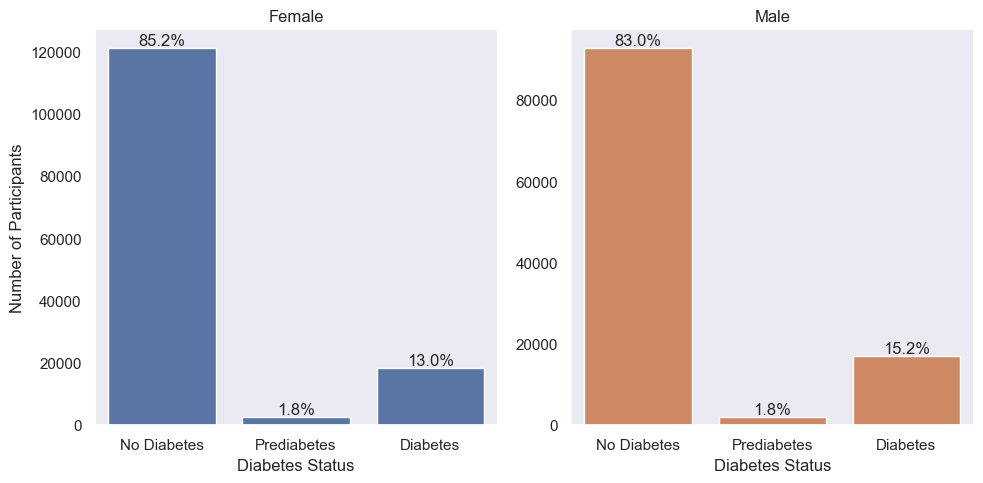

In [225]:
g = sns.catplot(
    data=df,
    x='diabetes_012',
    kind='count',
    col='sex',
    hue='sex',
    sharey=False
)

g.set_axis_labels("Diabetes Status", "Number of Participants")
g._legend.remove()

titles = {0: "Female", 1: "Male"}

for ax, title in zip(g.axes.flat, df['sex'].unique()):
    ax.set_title(titles[title])

for ax in g.axes.flat:
    total = sum(p.get_height() for p in ax.patches)
    for p in ax.patches:
        count = p.get_height()
        if count == 0:
            continue
        proportion = count / total * 100
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(f'{proportion:.1f}%', (x, y), ha='center', va='bottom')

labels = {0: "No Diabetes", 1: "Prediabetes", 2: "Diabetes"}

plt.xticks(
    ticks=[0, 1, 2],
    labels=[labels[i] for i in [0, 1, 2]]
)

plt.show()

The distribution of diabetes status is similar in both females and males.

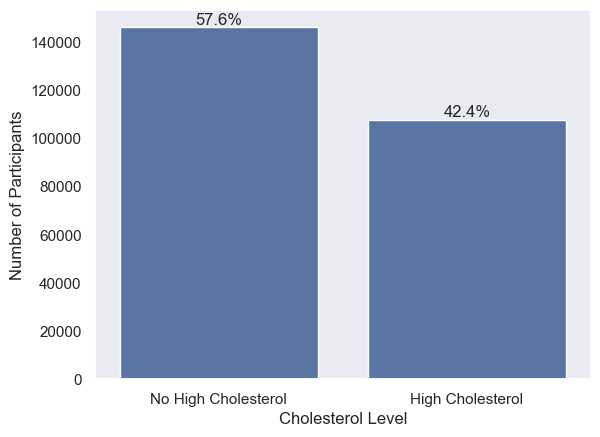

In [205]:
ax = sns.countplot(data=df, x='highchol')

for p in ax.patches:
    count = int(p.get_height())
    prop = count / len(df) * 100
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{prop:.1f}%', (x, y), ha='center', va='bottom')

labels = {0: "No High Cholesterol", 1: "High Cholesterol"}

plt.xticks(
    ticks=[0, 1],
    labels=[labels[i] for i in [0, 1]]
)

plt.xlabel("Cholesterol Level")
plt.ylabel("Number of Participants")

plt.show()

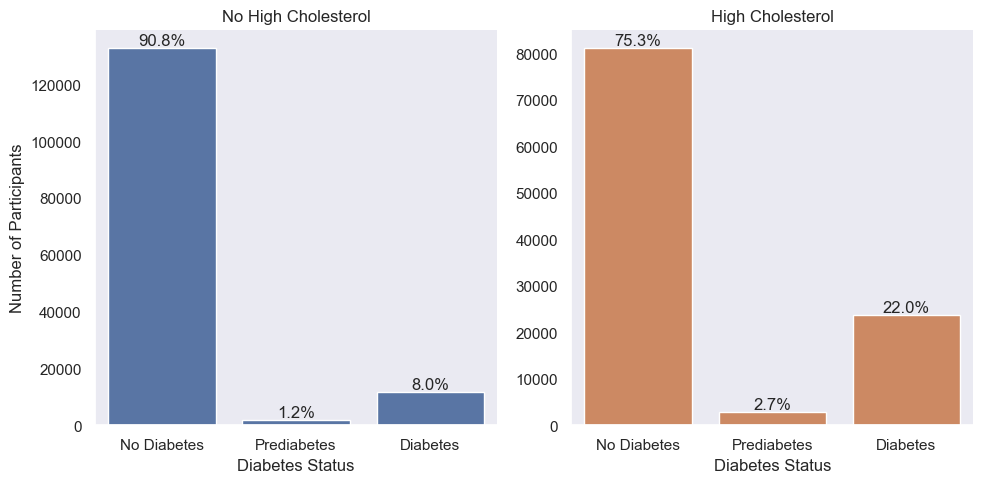

In [224]:
g = sns.catplot(
    data=df,
    x='diabetes_012',
    kind='count',
    col='highchol',
    hue='highchol',
    sharey=False
)

g.set_axis_labels("Diabetes Status", "Number of Participants")
g._legend.remove()

titles = {0: "No High Cholesterol", 1: "High Cholesterol"}

for ax, title in zip(g.axes.flat, sorted(df['highchol'].unique())):
    ax.set_title(titles[title])

for ax in g.axes.flat:
    total = sum(p.get_height() for p in ax.patches)
    for p in ax.patches:
        count = p.get_height()
        if count == 0:
            continue
        proportion = count / total * 100
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(f'{proportion:.1f}%', (x, y), ha='center', va='bottom')

labels = {0: "No Diabetes", 1: "Prediabetes", 2: "Diabetes"}

plt.xticks(
    ticks=[0, 1, 2],
    labels=[labels[i] for i in [0, 1, 2]]
)

plt.show()

8% of participants without high cholesterol have diabetes while 22% of participants with high cholesterol have diabetes. This appears to be an important factor.

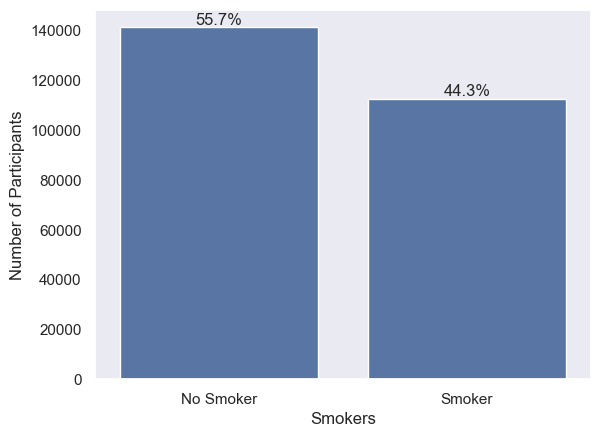

In [209]:
ax = sns.countplot(data=df, x='smoker')

for p in ax.patches:
    count = int(p.get_height())
    prop = count / len(df) * 100
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{prop:.1f}%', (x, y), ha='center', va='bottom')

labels = {0: "No Smoker", 1: "Smoker"}

plt.xticks(
    ticks=[0, 1],
    labels=[labels[i] for i in [0, 1]]
)

plt.xlabel("Smokers")
plt.ylabel("Number of Participants")

plt.show()

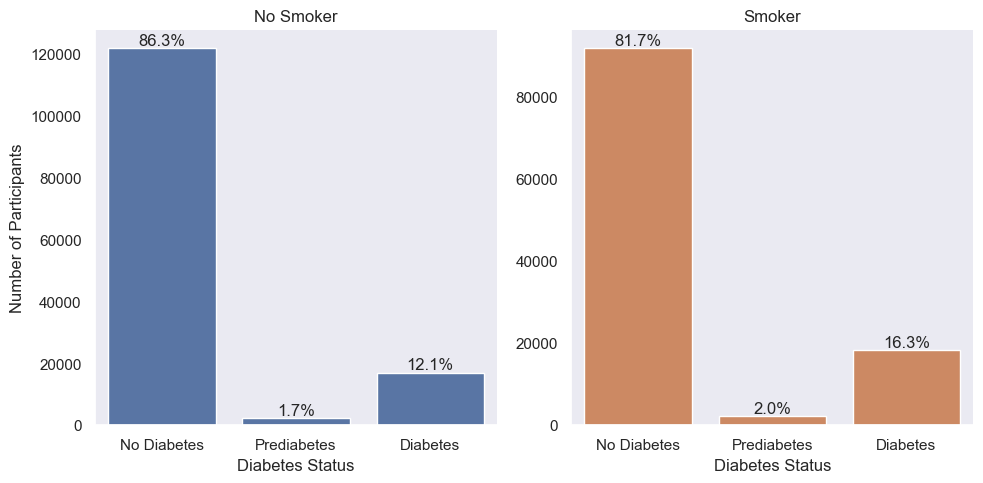

In [223]:
g = sns.catplot(
    data=df,
    x='diabetes_012',
    kind='count',
    col='smoker',
    hue='smoker',
    sharey=False
)

g.set_axis_labels("Diabetes Status", "Number of Participants")
g._legend.remove()

titles = {0: "No Smoker", 1: "Smoker"}

for ax, title in zip(g.axes.flat, sorted(df['smoker'].unique())):
    ax.set_title(titles[title])

for ax in g.axes.flat:
    total = sum(p.get_height() for p in ax.patches)
    for p in ax.patches:
        count = p.get_height()
        if count == 0:
            continue
        proportion = count / total * 100
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(f'{proportion:.1f}%', (x, y), ha='center', va='bottom')

labels = {0: "No Diabetes", 1: "Prediabetes", 2: "Diabetes"}

plt.xticks(
    ticks=[0, 1, 2],
    labels=[labels[i] for i in [0, 1, 2]]
)

plt.show()

56% of the participants are non-smokers. If we look at how this variable behaves in terms of diabetes status we can see that 12% of non-smokers have diabetes while 16% of smokers have diabetes. This could be considered an important variable although not as important as others. This could be more related to the habits of the participant.

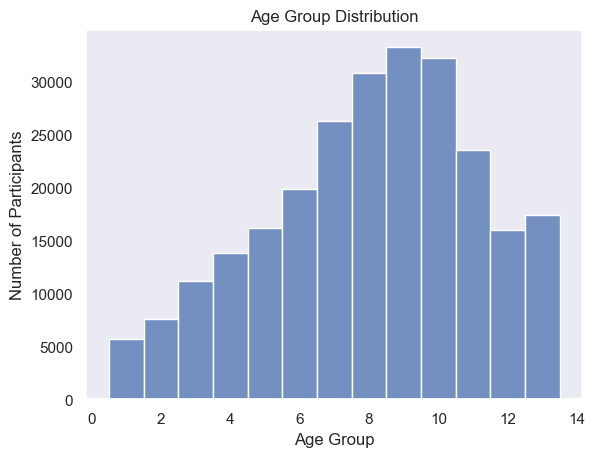

In [222]:
sns.histplot(data=df, x="age", binwidth=1, discrete=True)
plt.xlabel("Age Group")
plt.ylabel("Number of Participants")
plt.title("Age Group Distribution")

plt.show()

In terms of age groups, among the participants the age groups between 50 and 74 years dominate.

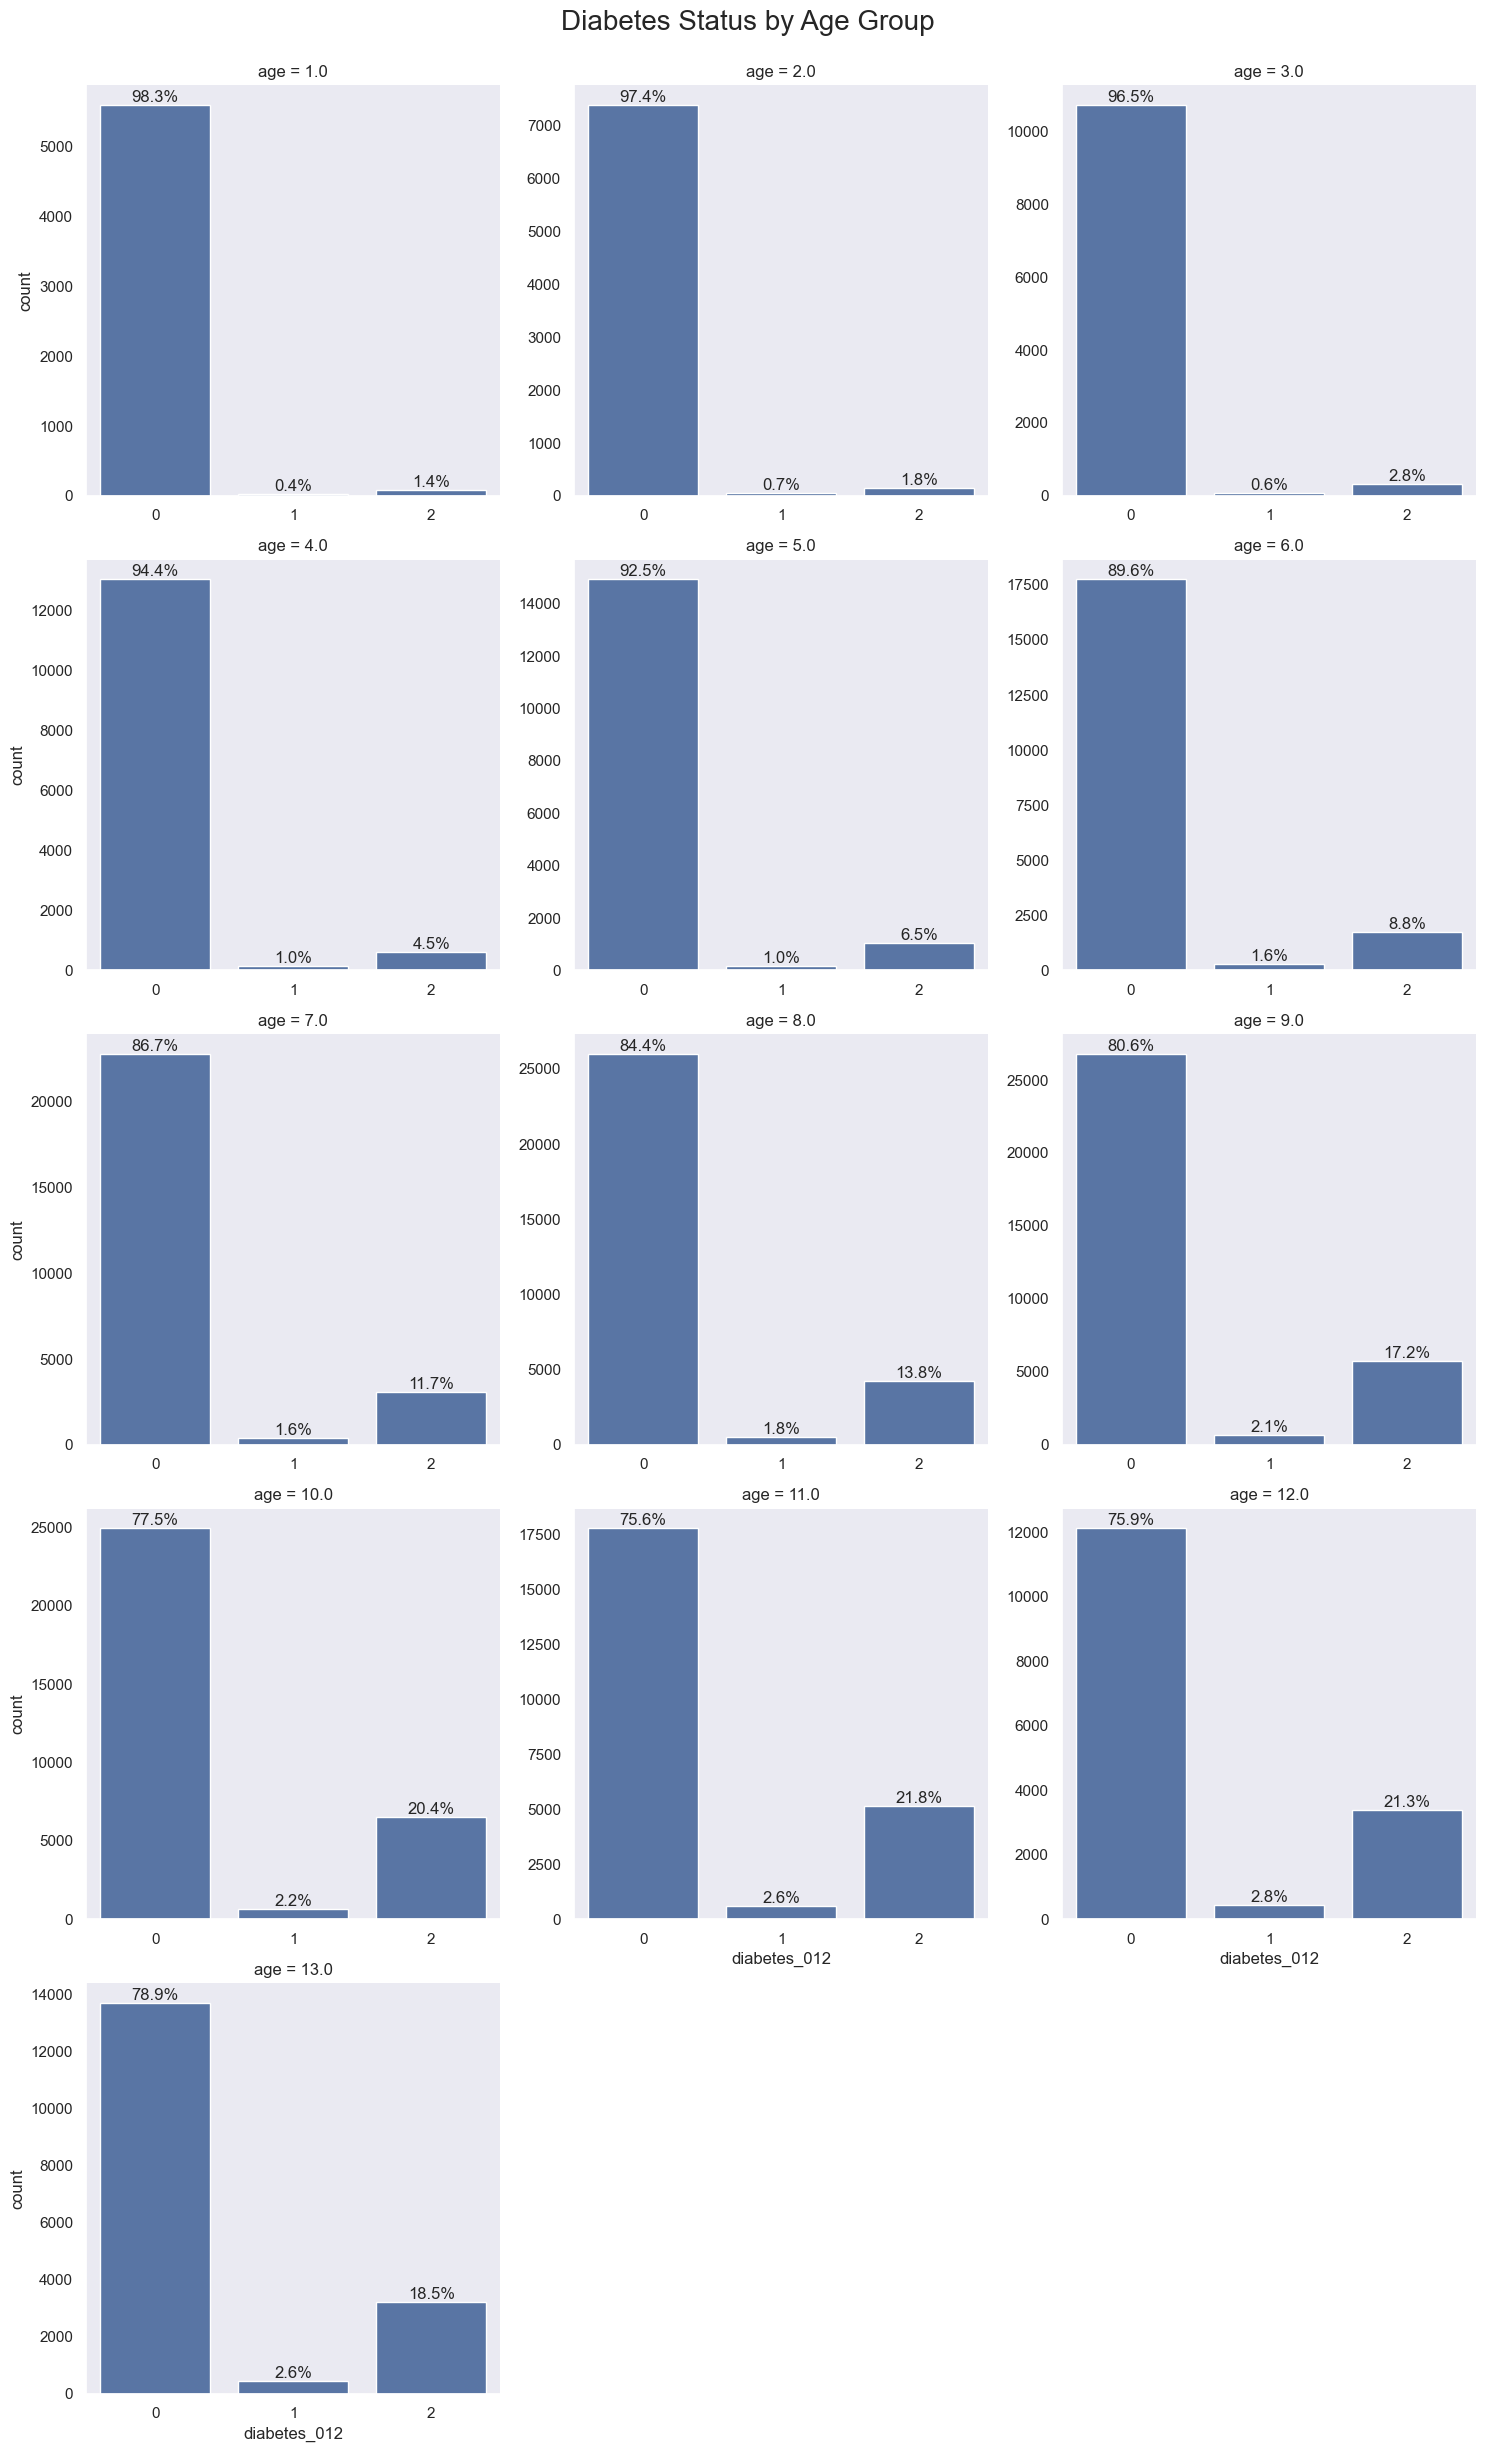

In [221]:
g = sns.catplot(
    data=df,
    x="diabetes_012",
    kind="count",
    col="age",         
    col_wrap=3,
    sharey=False,
    sharex=False         
)

for ax in g.axes.flat:
    total = sum(p.get_height() for p in ax.patches)
    for p in ax.patches:
        count = p.get_height()
        if count == 0:
            continue
        proportion = count / total * 100
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(f'{proportion:.1f}%', (x, y), ha='center', va='bottom')

g.fig.suptitle("Diabetes Status by Age Group", fontsize=20)
g.fig.subplots_adjust(top=0.95)

plt.show()

 If we analyse the diabetes status by age group we can see that as the age group increases the proportion of participants with diabetes increases, which is to be expected. Those with the highest proportion of diabetic participants are the participants between 70 and 80 years of age.

C:\Users\tomas\AppData\Local\Temp\ipykernel_14544\682870932.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


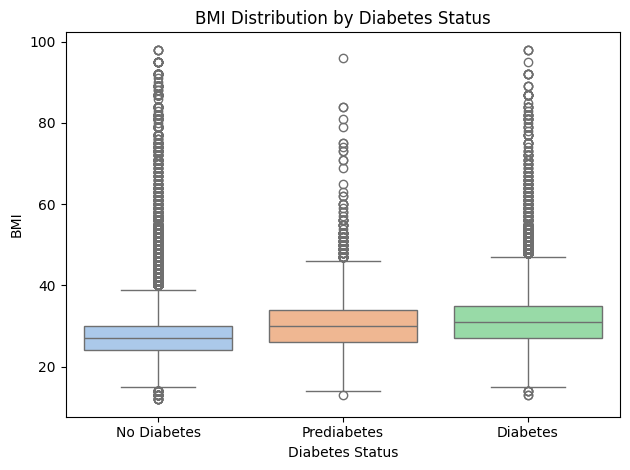

In [23]:
sns.boxplot(
    data=df,
    x="diabetes_012",
    y="bmi",
    palette="pastel"
)

labels = {0: "No Diabetes", 1: "Prediabetes", 2: "Diabetes"}

plt.xticks(
    ticks=[0, 1, 2],
    labels=[labels[i] for i in [0, 1, 2]]
)

plt.xlabel("Diabetes Status")
plt.ylabel("BMI")
plt.title("BMI Distribution by Diabetes Status")

plt.tight_layout()
plt.show()


C:\Users\tomas\AppData\Local\Temp\ipykernel_24788\4249198746.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


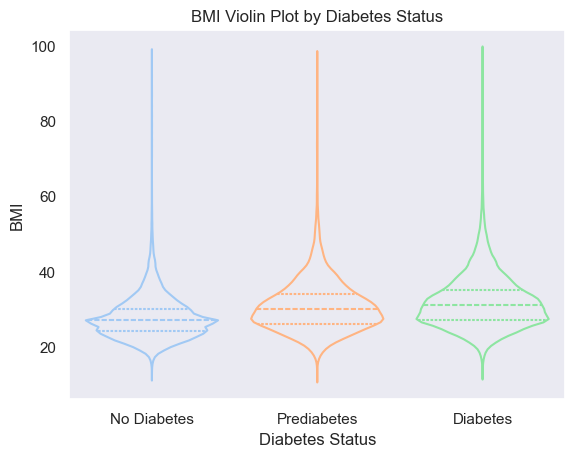

In [220]:
sns.violinplot(
    data=df,
    x="diabetes_012",
    y="bmi",
    inner="quart",
    palette="pastel",
    fill=False
)

labels = {0: "No Diabetes", 1: "Prediabetes", 2: "Diabetes"}

plt.xticks(
    ticks=[0, 1, 2],
    labels=[labels[i] for i in [0, 1, 2]]
)

plt.xlabel("Diabetes Status")
plt.ylabel("BMI")
plt.title("BMI Violin Plot by Diabetes Status")

plt.show()

Analysing the distribution of the variable BMI (body mass index) we notice that it is higher for those with diabetes or pre-diabetes, so we are talking about another important factor.

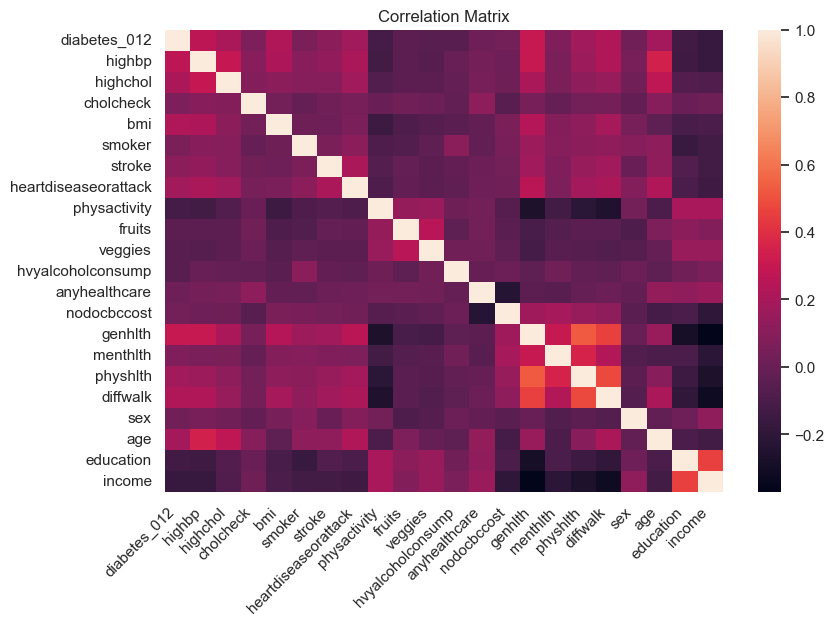

In [133]:
# We can plot the correlation matrix to see positive and negative correlations between columns.
plt.figure(figsize=(9, 6)) 

corr = df.corr()
sns.heatmap(corr)
plt.title("Correlation Matrix")

plt.xticks(rotation=45, ha='right') 

plt.show()

From the correlation matrix it can be seen that there is a positive relationship between diabetes status and the variables general health, physical activity and walking difficulties. This makes sense and shows that these are variables that could become important when developing a prediction model.

In [17]:
corr.diabetes_012

diabetes_012            1.000000
highbp                  0.271596
highchol                0.209085
cholcheck               0.067546
bmi                     0.224379
smoker                  0.062914
stroke                  0.107179
heartdiseaseorattack    0.180272
physactivity           -0.121947
fruits                 -0.042192
veggies                -0.058972
hvyalcoholconsump      -0.057882
anyhealthcare           0.015410
nodocbccost             0.035436
genhlth                 0.302587
menthlth                0.073507
physhlth                0.176287
diffwalk                0.224239
sex                     0.031040
age                     0.185026
education              -0.130517
income                 -0.171483
Name: diabetes_012, dtype: float64

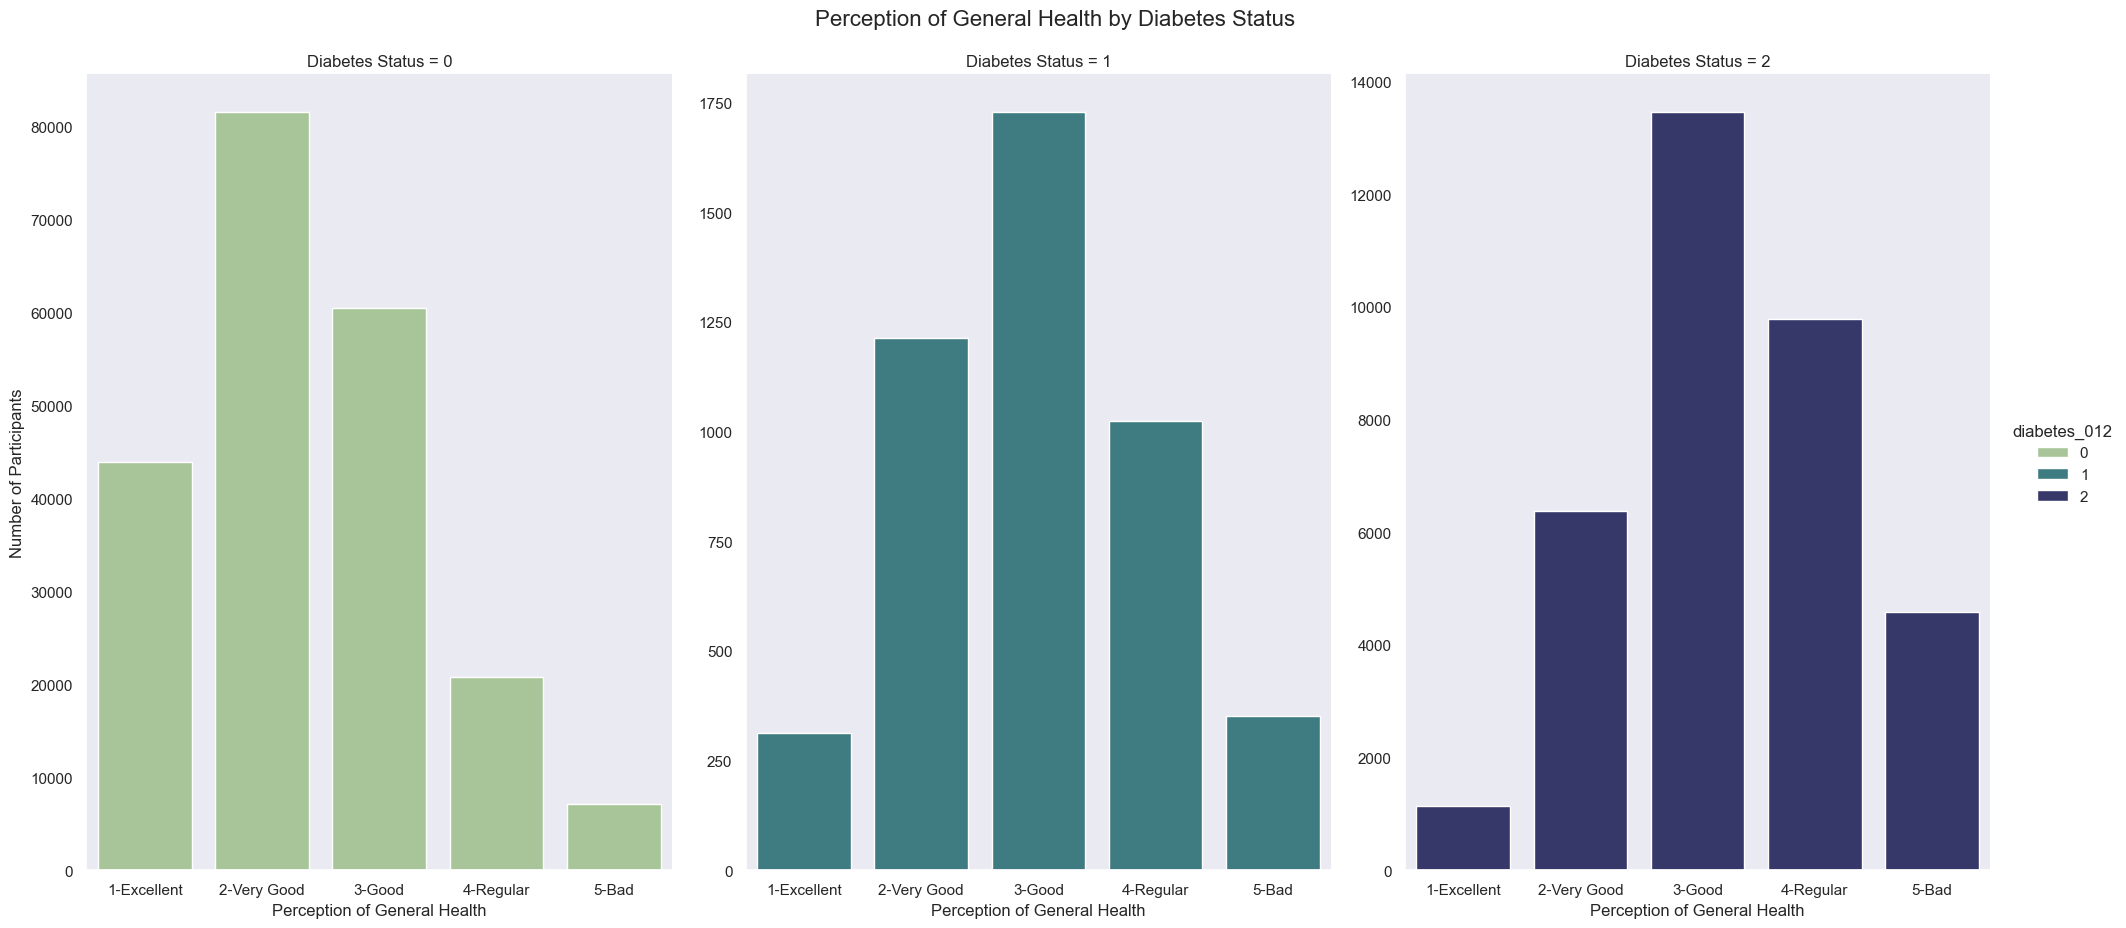

In [239]:
g = sns.catplot(data=df, x='genhlth', col='diabetes_012', hue='diabetes_012',kind='count', 
                sharey=False, height=9, aspect=0.75, palette='crest')

g.set_axis_labels("Perception of General Health", "Number of Participants")
g.set_titles("Diabetes Status = {col_name}")
g.fig.suptitle('Perception of General Health by Diabetes Status', y=1.03, fontsize=16)

g.set_xticklabels(['1-Excellent', '2-Very Good', '3-Good', '4-Regular', '5-Bad'])
plt.show()

In the case of how participants perceived general health there is a clear trend showing that those who perceive better health do not have diabetes while those who perceive poor health tend to have pre-diabetes or diabetes.

The same as above can be seen in the variables of physical activity and vegetables/fruits (participants who include these products in their diet). 

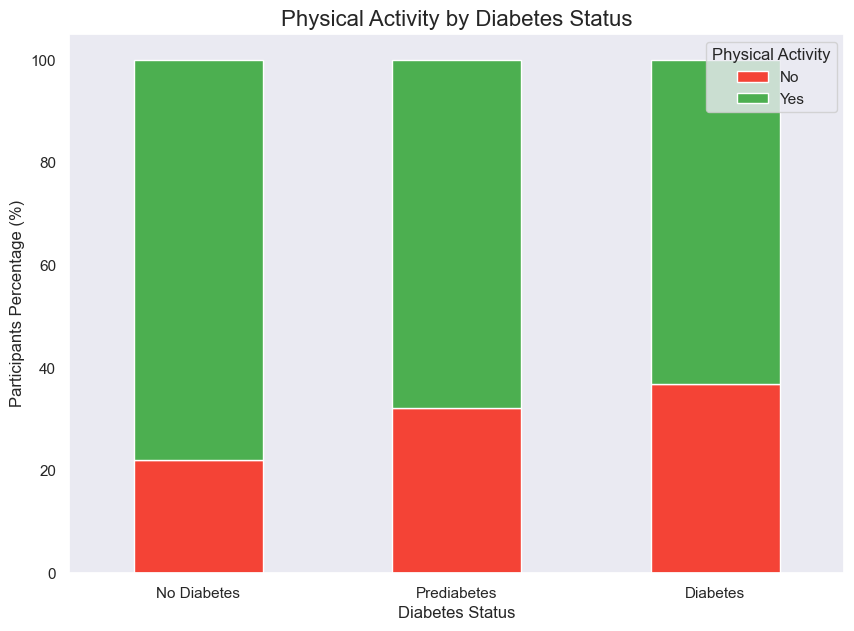

In [ ]:
ct = pd.crosstab(df['diabetes_012'], df['physactivity'], normalize='index') * 100

ct.plot(kind='bar', stacked=True, figsize=(10, 7), 
        color=['#F44336','#4CAF50'])

plt.title('Physical Activity by Diabetes Status', fontsize=16)
plt.xlabel('Diabetes Status', fontsize=12)
plt.ylabel('Participants Percentage (%)', fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=['No Diabetes', 'Prediabetes', 'Diabetes'], rotation=0)
plt.legend(title='Physical Activity', labels=['No', 'Yes'])
plt.show()

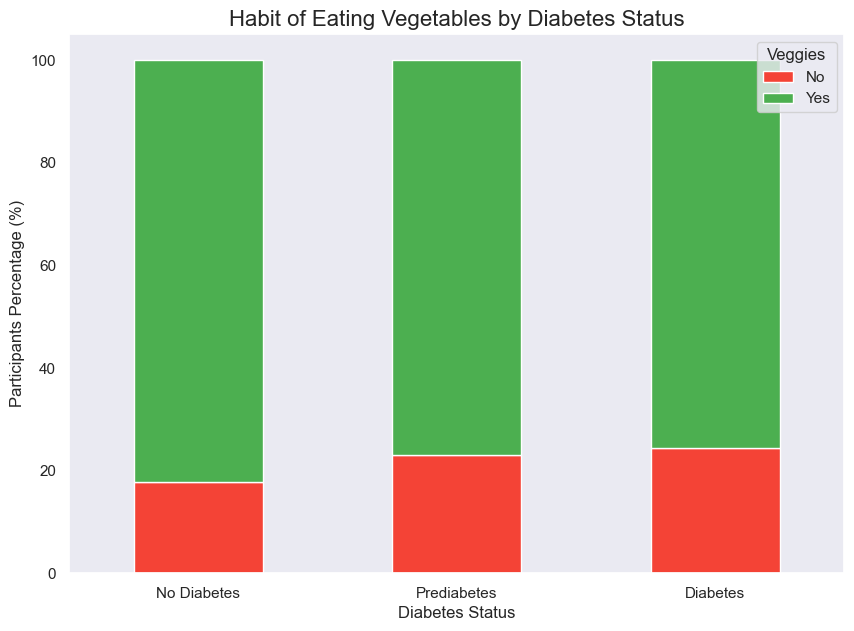

In [ ]:
ct = pd.crosstab(df['diabetes_012'], df['veggies'], normalize='index') * 100

ct.plot(kind='bar', stacked=True, figsize=(10, 7), 
        color=['#F44336','#4CAF50'])

plt.title('Habit of Eating Vegetables by Diabetes Status', fontsize=16)
plt.xlabel('Diabetes Status', fontsize=12)
plt.ylabel('Participants Percentage (%)', fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=['No Diabetes', 'Prediabetes', 'Diabetes'], rotation=0)
plt.legend(title='Veggies', labels=['No', 'Yes'])
plt.show()

Comparing body mass index with age groups and segmenting them by diabetes status it can be deduced that middle-aged groups have higher body mass while older groups have lower body mass but still have a higher proportion of diabetic participants.

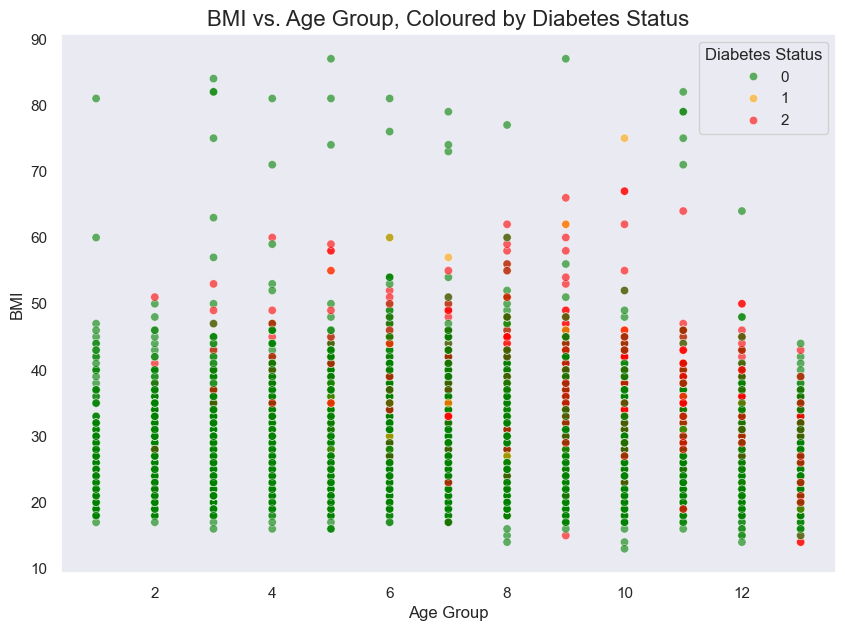

In [260]:
# Usamos una muestra para que el gráfico sea legible
df_sample = df.sample(n=10000, random_state=1)

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_sample, x='age', y='bmi', hue='diabetes_012', 
                palette=['green', 'orange', 'red'], alpha=0.6)

plt.title('BMI vs. Age Group, Coloured by Diabetes Status', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.legend(title='Diabetes Status')
plt.show()

#### Setting Up The Validation Framework

In [13]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [14]:
len(df_train), len(df_val), len(df_test)

(152208, 50736, 50736)

In [15]:
df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [16]:
y_train = df_train.diabetes_012.values
y_val = df_val.diabetes_012.values
y_test = df_test.diabetes_012.values

In [17]:
del df_train["diabetes_012"]
del df_val["diabetes_012"]
del df_test["diabetes_012"]

#### Models

Decision Tree

In [23]:
dt = DecisionTreeClassifier()
dt.fit(df_train, y_train)

DecisionTreeClassifier()

In [29]:
y_pred = dt.predict(df_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86     42691
           1       0.02      0.03      0.02       949
           2       0.29      0.32      0.30      7096

    accuracy                           0.76     50736
   macro avg       0.39      0.40      0.40     50736
weighted avg       0.78      0.76      0.77     50736



In [25]:
f1_weighted = f1_score(y_val, y_pred, average="weighted")
f1_weighted.round(4)

0.7699

In [26]:
f1_macro = f1_score(y_val, y_pred, average="macro")
f1_macro.round(4)

0.3966

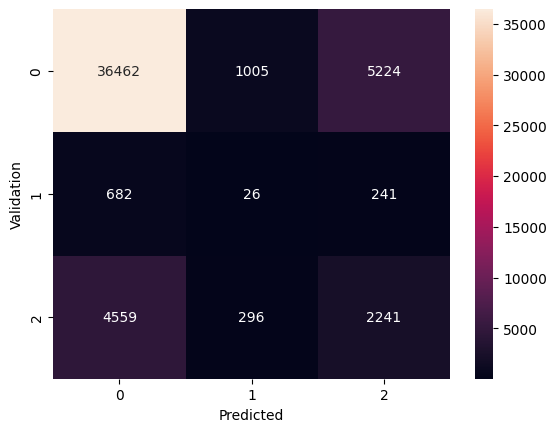

In [30]:
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Validation')
plt.show()

In [28]:
y_pred = dt.predict_proba(df_val)
y_val_bin = label_binarize(y_val, classes=[0, 1, 2])

auc_pr_w = average_precision_score(y_val_bin, y_pred, average="weighted")
auc_pr_m = average_precision_score(y_val_bin, y_pred, average="macro")

print(f"Weighted AUC-PR: {auc_pr_w.round(4)}")
print(f"Macro AUC-PR: {auc_pr_m.round(4)}")

Weighted AUC-PR: 0.758
Macro AUC-PR: 0.3588


#### 
We can find for the best parameters to try to improve the Decision Tree model. 

In [31]:
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(df_train, y_train)

    y_pred = dt.predict(df_val)
    f1_weighted = f1_score(y_val, y_pred, average="weighted")

    print('%4s -> %.3f' % (d, f1_weighted))

   1 -> 0.769
   2 -> 0.769
   3 -> 0.769
   4 -> 0.806
   5 -> 0.802
   6 -> 0.802
  10 -> 0.805
  15 -> 0.796
  20 -> 0.783
None -> 0.771


In [32]:
scores = []

for d in [4,5,6,10]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:

        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(df_train, y_train)

        y_pred = dt.predict(df_val)
        f1_weighted = f1_score(y_val, y_pred, average="weighted")

        scores.append((d, s, f1_weighted))

In [33]:
df_scores = pd.DataFrame(scores, columns=['max_depth', 'min_samples_leaf', 'f1_weighted'])
df_scores.sort_values(by='f1_weighted', ascending=False).head()

,max_depth,min_samples_leaf,f1_weighted
31,10,15,0.806912
32,10,20,0.806819
30,10,10,0.806339
7,4,200,0.805876
1,4,2,0.805876


In [34]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['f1_weighted'])
df_scores_pivot.round(3)

f1_weighted                     
max_depth                 4      5      6      10
min_samples_leaf                                 
1                      0.806  0.802  0.802  0.805
2                      0.806  0.802  0.802  0.805
5                      0.806  0.802  0.802  0.805
10                     0.806  0.802  0.802  0.806
15                     0.806  0.802  0.802  0.807
20                     0.806  0.802  0.802  0.807
100                    0.806  0.802  0.802  0.805
200                    0.806  0.802  0.802  0.803
500                    0.806  0.802  0.802  0.801

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

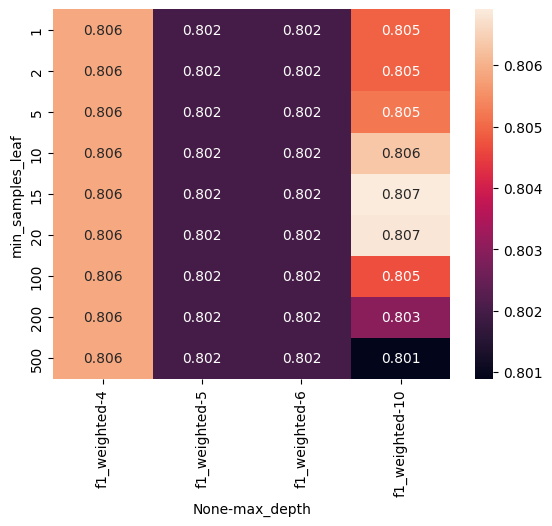

In [ ]:
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f')
plt.show()

In [18]:
# max_depth = 10 & min_samples_leaf = 15 seems to be the best parameters for Decision Tree in this dataset
dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=15)
dt.fit(df_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=15)

In [19]:
y_pred = dt.predict_proba(df_val)
y_val_bin = label_binarize(y_val, classes=[0, 1, 2])

auc_pr_w = average_precision_score(y_val_bin, y_pred, average="weighted")
auc_pr_m = average_precision_score(y_val_bin, y_pred, average="macro")

print(f"Weighted AUC-PR: {auc_pr_w.round(4)}")
print(f"Macro AUC-PR: {auc_pr_m.round(4)}")

Weighted AUC-PR: 0.8588
Macro AUC-PR: 0.4638


In [20]:
y_pred = dt.predict(df_val)

print(classification_report(y_val, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92     42691
           1       0.00      0.00      0.00       949
           2       0.54      0.17      0.26      7096

    accuracy                           0.85     50736
   macro avg       0.47      0.38      0.39     50736
weighted avg       0.80      0.85      0.81     50736



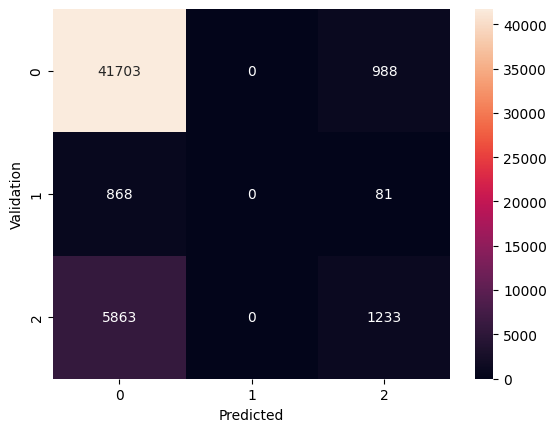

In [39]:
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Validation')
plt.show()

We can observe that although the model improved its performance when searching for the best parameters, this improvement in performance is due to the fact that it started to ignore the minority class (less than 2%) and only predicts between 2 classes.
This is the result of the class imbalance that we marked in the data analysis.

With GridSearchCV and RandomizedSearchCV we can find the best hiperparameters more quickly.

In [283]:
param_dist = {
    'max_depth': [1, 5, 10, 20],
    'min_samples_leaf': [1,3,5,10,15,30]
}

f1_weighted = make_scorer(f1_score, average='weighted')

model = DecisionTreeClassifier()

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   n_iter=20, cv=5, scoring=f1_weighted, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=param_dist, cv=5, scoring=f1_weighted)

random_search.fit(df_train, y_train)
grid_search.fit(df_train, y_train)

print("Best Hiperparameters (Grid Search):", grid_search.best_params_)
print("Best Hiperparameters (Randomized Search):", random_search.best_params_)

Best Hiperparameters (Grid Search): {'max_depth': 20, 'min_samples_leaf': 30}
Best Hiperparameters (Randomized Search): {'min_samples_leaf': 30, 'max_depth': 20}


In [ ]:
# Decision Tree with the best hiperparameters according to GridSearchCV and RandomizedSearchCV
dt = DecisionTreeClassifier(max_depth=20, min_samples_leaf=30)
dt.fit(df_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=30)

In [285]:
y_pred = dt.predict_proba(df_val)
y_val_bin = label_binarize(y_val, classes=[0, 1, 2])

auc_pr_w = average_precision_score(y_val_bin, y_pred, average="weighted")
auc_pr_m = average_precision_score(y_val_bin, y_pred, average="macro")

print(f"Weighted AUC-PR: {auc_pr_w.round(4)}")
print(f"Macro AUC-PR: {auc_pr_m.round(4)}")

Weighted AUC-PR: 0.8491
Macro AUC-PR: 0.4508


In [ ]:
y_pred = dt.predict(df_val)

print(classification_report(y_val, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     42691
           1       1.00      0.00      0.00       949
           2       0.47      0.20      0.28      7096

    accuracy                           0.84     50736
   macro avg       0.78      0.39      0.40     50736
weighted avg       0.81      0.84      0.81     50736



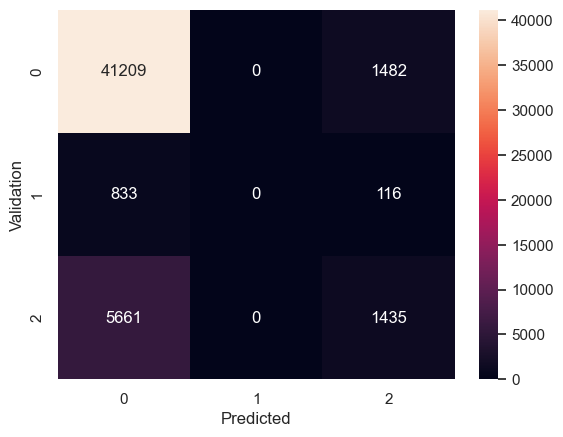

In [287]:
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Validation')
plt.show()

Random Forest Classifier

In [40]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(df_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [41]:
y_pred = rf.predict(df_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     42691
           1       0.03      0.00      0.01       949
           2       0.44      0.20      0.27      7096

    accuracy                           0.83     50736
   macro avg       0.44      0.39      0.39     50736
weighted avg       0.79      0.83      0.80     50736



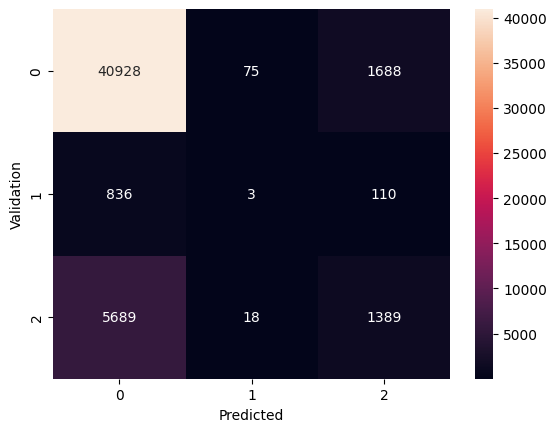

In [42]:
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Validation')
plt.show()

In [43]:
y_pred = rf.predict_proba(df_val)
y_val_bin = label_binarize(y_val, classes=[0, 1, 2])

auc_pr_w = average_precision_score(y_val_bin, y_pred, average="weighted")
auc_pr_m = average_precision_score(y_val_bin, y_pred, average="macro")

print(f"Weighted AUC-PR: {auc_pr_w.round(4)}")
print(f"Macro AUC-PR: {auc_pr_m.round(4)}")

Weighted AUC-PR: 0.8244
Macro AUC-PR: 0.4209


Looking for the best parameters for Random Forest.

In [44]:
scores = []

for n in tqdm(range(10, 200, 10)):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(df_train, y_train)

    y_val_bin = label_binarize(y_val, classes=[0, 1, 2])
    y_pred = rf.predict_proba(df_val)
    
    auc_pr_w = average_precision_score(y_val_bin, y_pred, average="weighted")
    auc_pr_m = average_precision_score(y_val_bin, y_pred, average="macro")

    scores.append((n, auc_pr_w, auc_pr_m))

100%|██████████| 19/19 [06:30<00:00, 20.56s/it]


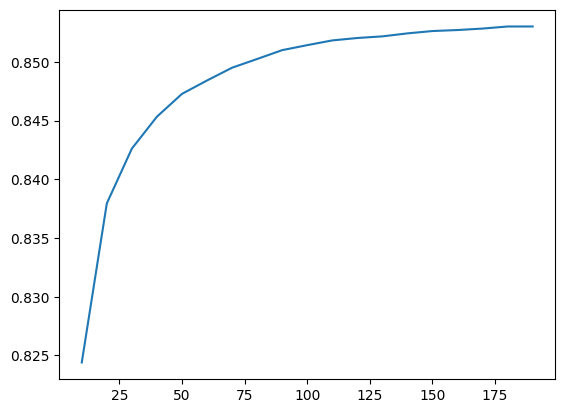

In [45]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc_pr_w', 'auc_pr_m'])

plt.plot(df_scores.n_estimators, df_scores.auc_pr_w)
plt.show()

In [ ]:
df_scores.sort_values(by="auc_pr_w", ascending=False) # n_estimators = 100 seems to be fine

,n_estimators,auc_pr_w,auc_pr_m
18,190,0.853018,0.452326
17,180,0.853016,0.452314
16,170,0.852840,0.452081
15,160,0.852716,0.451956
14,150,0.852630,0.451827
13,140,0.852431,0.451558
12,130,0.852176,0.451236
11,120,0.852036,0.451099
10,110,0.851831,0.450737
9,100,0.851428,0.450224


In [52]:
n = 100
scores = []

for d in tqdm([5,10,15]):
    rf = RandomForestClassifier(n_estimators=n, max_depth=d,random_state=1)
    rf.fit(df_train, y_train)

    y_val_bin = label_binarize(y_val, classes=[0, 1, 2])
    y_pred = rf.predict_proba(df_val)
    
    auc_pr_w = average_precision_score(y_val_bin, y_pred, average="weighted")
    auc_pr_m = average_precision_score(y_val_bin, y_pred, average="macro")

    print((d, auc_pr_w, auc_pr_m))
    scores.append((d, auc_pr_w, auc_pr_m))

 33%|███▎      | 1/3 [00:06<00:13,  6.63s/it]

(5, 0.8644640235158082, 0.4696732579239104)


 67%|██████▋   | 2/3 [00:29<00:16, 16.11s/it]

(10, 0.8686064731133272, 0.47592745653566865)


100%|██████████| 3/3 [00:47<00:00, 15.87s/it]

(15, 0.868127954744631, 0.4747347657219751)


In [53]:
df_scores = pd.DataFrame(scores, columns=['d', 'auc_pr_w', 'auc_pr_m'])
df_scores

,d,auc_pr_w,auc_pr_m
0,5,0.864464,0.469673
1,10,0.868606,0.475927
2,15,0.868128,0.474735


In [54]:
n = 100
d = 10
scores = []

for s in tqdm([1,3,5,10,50]):
    rf = RandomForestClassifier(n_estimators=n, max_depth=d, min_samples_leaf=s,random_state=1)
    rf.fit(df_train, y_train)

    y_val_bin = label_binarize(y_val, classes=[0, 1, 2])
    y_pred = rf.predict_proba(df_val)
    
    auc_pr_w = average_precision_score(y_val_bin, y_pred, average="weighted")
    auc_pr_m = average_precision_score(y_val_bin, y_pred, average="macro")

    print((s, auc_pr_w, auc_pr_m))
    scores.append((s, auc_pr_w, auc_pr_m))

  0%|          | 0/5 [00:00<?, ?it/s]

 20%|██        | 1/5 [00:13<00:55, 13.79s/it]

(1, 0.8686064731133272, 0.47592745653566865)


 40%|████      | 2/5 [00:38<01:00, 20.18s/it]

(3, 0.8686578940563402, 0.47617850649735477)


 60%|██████    | 3/5 [00:58<00:39, 19.95s/it]

(5, 0.8689322877909462, 0.47639879734851354)


 80%|████████  | 4/5 [01:13<00:18, 18.28s/it]

(10, 0.8686150163360332, 0.4764795783020274)


100%|██████████| 5/5 [01:39<00:00, 19.92s/it]

(50, 0.8683102471168107, 0.4760897416335148)


In [55]:
df_scores = pd.DataFrame(scores, columns=['s', 'auc_pr_w', 'auc_pr_m'])
df_scores.sort_values(by="auc_pr_w",ascending=False).reset_index(drop=True)

,s,auc_pr_w,auc_pr_m
0,5,0.868932,0.476399
1,3,0.868658,0.476179
2,10,0.868615,0.476480
3,1,0.868606,0.475927
4,50,0.868310,0.476090


In [21]:
# Best RF model for this dataset
rf = RandomForestClassifier(n_estimators=100,max_depth=10, min_samples_leaf=5, random_state=1)
rf.fit(df_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, random_state=1)

In [22]:
y_pred = rf.predict(df_val)
print(classification_report(y_val, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92     42691
           1       0.00      0.00      0.00       949
           2       0.62      0.11      0.18      7096

    accuracy                           0.85     50736
   macro avg       0.49      0.37      0.37     50736
weighted avg       0.80      0.85      0.80     50736



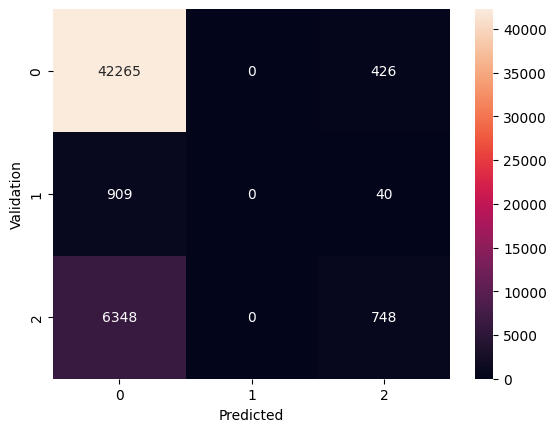

In [58]:
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Validation')
plt.show()

In [297]:
param_dist = {
    'max_depth': [1, 5, 10, 20],
    'min_samples_leaf': [1,5,10,15,30],
    'n_estimators': [50,100,150]
}

f1_weighted = make_scorer(f1_score, average='weighted')

model = RandomForestClassifier()

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   n_iter=10, cv=3, scoring=f1_weighted, random_state=1)

random_search.fit(df_train, y_train)

print("Best Hiperparameters (Randomized Search):", random_search.best_params_)

Best Hiperparameters (Randomized Search): {'n_estimators': 50, 'min_samples_leaf': 5, 'max_depth': 20}


In [298]:
rf = RandomForestClassifier(n_estimators=50,max_depth=20, min_samples_leaf=5, random_state=1)
rf.fit(df_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=50,
                       random_state=1)

In [316]:
y_pred = rf.predict(df_val)
print(classification_report(y_val, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92     42691
           1       0.00      0.00      0.00       949
           2       0.57      0.15      0.24      7096

    accuracy                           0.85     50736
   macro avg       0.48      0.38      0.39     50736
weighted avg       0.80      0.85      0.80     50736



In [302]:
y_val_bin = label_binarize(y_val, classes=[0, 1, 2])
y_pred = rf.predict_proba(df_val)

auc_pr_w = average_precision_score(y_val_bin, y_pred, average="weighted")
auc_pr_m = average_precision_score(y_val_bin, y_pred, average="macro")

print(f"Weighted AUC-PR: {auc_pr_w.round(4)}")
print(f"Macro AUC-PR: {auc_pr_m.round(4)}")

Weighted AUC-PR: 0.867
Macro AUC-PR: 0.4733


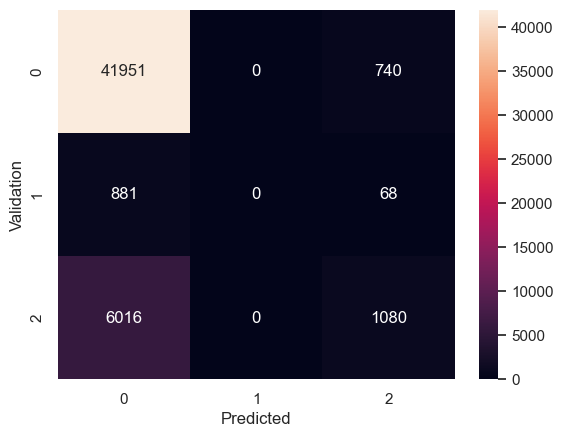

In [300]:
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Validation')
plt.show()

### XGBoost

In [303]:
dtrain = xgb.DMatrix(df_train, label= y_train)
dval = xgb.DMatrix(df_val, label=y_val)

In [311]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'multi:softprob',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    'num_class': 3
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [315]:
y_pred = model.predict(dval)
y_pred = y_pred.argmax(axis=1) 
print(classification_report(y_val, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     42691
           1       0.00      0.00      0.00       949
           2       0.60      0.14      0.23      7096

    accuracy                           0.85     50736
   macro avg       0.49      0.37      0.38     50736
weighted avg       0.81      0.85      0.80     50736



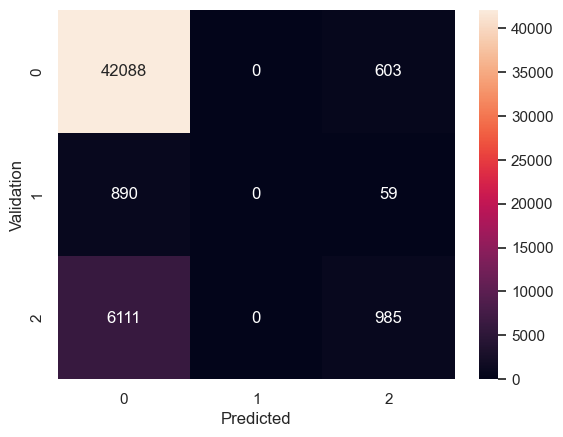

In [306]:
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Validation')
plt.show()

XGBoost Parameter Tuning

In [95]:
scores = {}

In [321]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [ ]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 5,
    'min_child_weight': 3,
    'objective': 'multi:softprob',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    'num_class': 3,
    'eval_metric': ['merror','mlogloss']
}

model = xgb.train(xgb_params, dtrain, evals= watchlist, evals_result=scores,
                    verbose_eval=5, num_boost_round=200)

In [103]:
df_results = pd.DataFrame({
    'num_iter': range(len(scores['train']['merror'])),
    'train_merror': scores['train']['merror'],
    'val_merror': scores['val']['merror'],
    'train_mlogloss': scores['train']['mlogloss'],
    'val_mlogloss': scores['val']['mlogloss']
})

In [ ]:
# We need to save the key after running the model so then we can plot them. As we have seen there are simpler ways to do it but this is a way of evaluating 
# parameter by parameter.

key = 'eta=%s' % (xgb_params['eta'])
scores[key] = df_results
key

'eta=0.1'

In [105]:
scores['eta=0.01']

,num_iter,train_merror,val_merror,train_mlogloss,val_mlogloss
0,0,0.152324,0.152318,1.088789,1.088792
1,1,0.152324,0.152318,1.079140,1.079147
2,2,0.152324,0.152318,1.069662,1.069672
3,3,0.152324,0.152318,1.060350,1.060362
4,4,0.152324,0.152318,1.051200,1.051215
...,...,...,...,...,...
195,195,0.151602,0.152062,0.460849,0.461699
196,196,0.151602,0.152062,0.460106,0.460960
197,197,0.151635,0.152259,0.459368,0.460228
198,198,0.151648,0.152219,0.458643,0.459509


(0.845, 0.855)

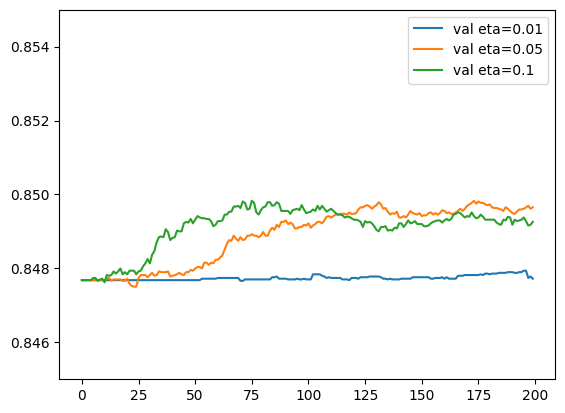

In [ ]:
etas = ['eta=0.01', 'eta=0.05', 'eta=0.1']

for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, 1-df_score.val_merror, label='val %s' % eta)
plt.legend()
plt.ylim(0.845,0.855)
plt.show()

In [107]:
scores = {}

In [ ]:
%%capture output

xgb_params = {
    'eta': 0.05, 
    'max_depth': 10,
    'min_child_weight': 3,
    'objective': 'multi:softprob',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    'num_class': 3,
    'eval_metric': 'merror'
}

model = xgb.train(xgb_params, dtrain, evals= watchlist, evals_result=scores,
                    verbose_eval=5, num_boost_round=200)

In [118]:
df_results = pd.DataFrame({
    'num_iter': range(len(scores['train']['merror'])),
    'train_merror': scores['train']['merror'],
    'val_merror': scores['val']['merror']
})

In [ ]:
# We need to save the key after running the model so then we can plot them. As we have seen there are simpler ways to do it but this is a way of evaluating 
# parameter by parameter.

key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = df_results
key

'max_depth=10'

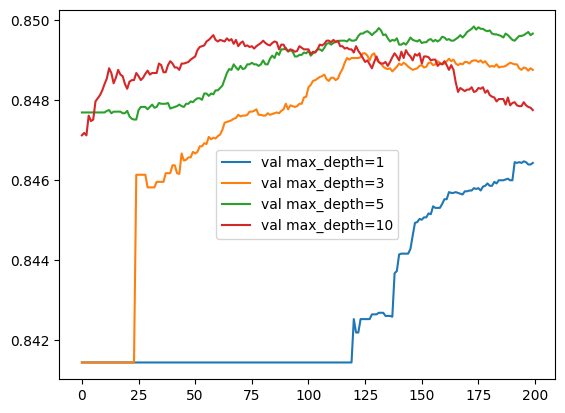

In [ ]:
max_depths = ['max_depth=1', 'max_depth=3','max_depth=5','max_depth=10']

for d in max_depths:
    df_score = scores[d]
    plt.plot(df_score.num_iter, 1-df_score.val_merror, label='val %s' % d)

plt.legend()
plt.show()

In [121]:
scores = {}

In [332]:
%%capture output

xgb_params = {
    'eta': 0.05, 
    'max_depth': 5,
    'min_child_weight': 30,
    'objective': 'multi:softprob',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    'num_class': 3,
    'eval_metric': 'merror'
}

model = xgb.train(xgb_params, dtrain, evals= watchlist, evals_result=scores,
                    verbose_eval=5, num_boost_round=200)

In [132]:
df_results = pd.DataFrame({
    'num_iter': range(len(scores['train']['merror'])),
    'train_merror': scores['train']['merror'],
    'val_merror': scores['val']['merror']
})

In [ ]:
# We need to save the key after running the model so then we can plot them. As we have seen there are simpler ways to do it but this is a way of evaluating 
# parameter by parameter.

key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = df_results
key

'min_child_weight=30'

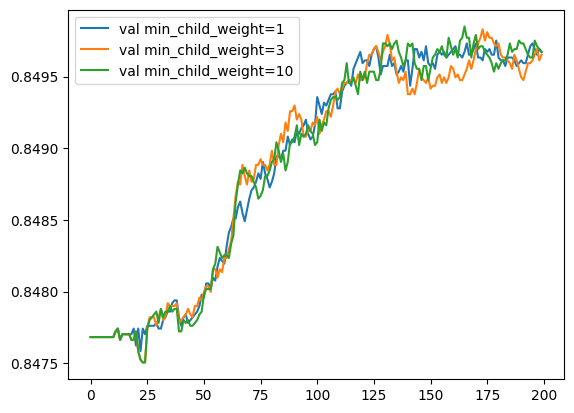

In [ ]:
min_child_weights = ['min_child_weight=1','min_child_weight=3', 'min_child_weight=10']

for s in min_child_weights:
    df_score = scores[s]
    plt.plot(df_score.num_iter, 1-df_score.val_merror, label='val %s' % s)

plt.legend()
plt.show()

Here are the best hiperparameters. We can use other tools as we have already seen, but we have to consider that the more parameters we use, the more time it will take.


In [317]:
scores = {}

In [322]:
%%capture output

xgb_params = {
    'eta': 0.05, 
    'max_depth': 5,
    'min_child_weight': 10,
    'objective': 'multi:softprob',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    'num_class': 3,
    'eval_metric': 'merror'
}

model = xgb.train(xgb_params, dtrain, evals= watchlist, evals_result=scores,
                    verbose_eval=5, num_boost_round=300)

In [323]:
df_results = pd.DataFrame({
    'num_iter': range(len(scores['train']['merror'])),
    'train_merror': scores['train']['merror'],
    'val_merror': scores['val']['merror']
})

In [324]:
df_results["train_auc"] = 1 - df_results.train_merror
df_results["val_auc"] = 1 - df_results.val_merror

In [325]:
df_results.sort_values(by="val_auc",ascending=False).round(4)

,num_iter,train_merror,val_merror,train_auc,val_auc
165,165,0.1485,0.1501,0.8515,0.8499
170,170,0.1485,0.1502,0.8515,0.8498
164,164,0.1485,0.1502,0.8515,0.8498
158,158,0.1487,0.1502,0.8513,0.8498
167,167,0.1485,0.1502,0.8515,0.8498
...,...,...,...,...,...
19,19,0.1520,0.1523,0.8480,0.8477
21,21,0.1519,0.1524,0.8481,0.8476
22,22,0.1518,0.1525,0.8482,0.8475
23,23,0.1518,0.1525,0.8482,0.8475


In [326]:
y_pred = model.predict(dval)
y_pred = y_pred.argmax(axis=1) 
print(classification_report(y_val, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92     42691
           1       0.00      0.00      0.00       949
           2       0.56      0.19      0.28      7096

    accuracy                           0.85     50736
   macro avg       0.48      0.39      0.40     50736
weighted avg       0.81      0.85      0.81     50736



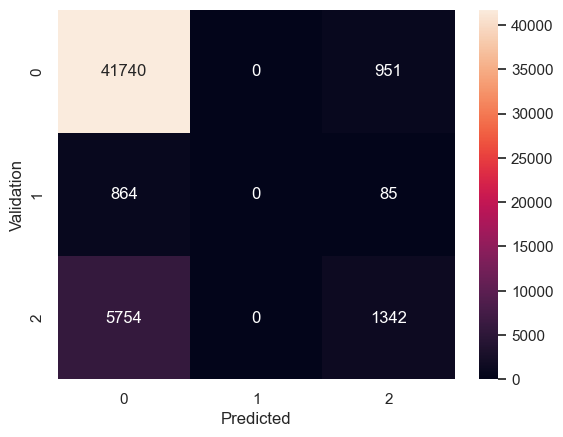

In [327]:
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Validation')
plt.show()

Feature Importance for the XGBoost Model

In [330]:
importance = model.get_score(importance_type='gain',)
importance

{'highbp': 176.40829467773438,
 'highchol': 23.444421768188477,
 'cholcheck': 11.927048683166504,
 'bmi': 9.803401947021484,
 'smoker': 1.845548391342163,
 'stroke': 3.655836343765259,
 'heartdiseaseorattack': 8.88546371459961,
 'physactivity': 2.100257635116577,
 'fruits': 1.779064655303955,
 'veggies': 2.160621404647827,
 'hvyalcoholconsump': 14.782629013061523,
 'anyhealthcare': 1.8186886310577393,
 'nodocbccost': 1.9933643341064453,
 'genhlth': 42.80911636352539,
 'menthlth': 1.9033076763153076,
 'physhlth': 2.024881362915039,
 'diffwalk': 9.34424114227295,
 'sex': 4.8339457511901855,
 'age': 9.592044830322266,
 'education': 2.5590660572052,
 'income': 4.00279426574707}

Plotting the model feature importance is a good way to see which columns are most relevant to the model.

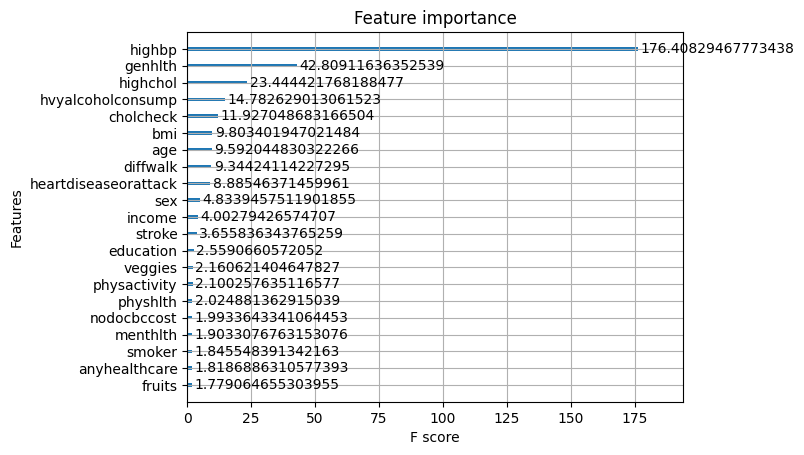

In [ ]:
xgb.plot_importance(model, importance_type='gain')
plt.show()

In [25]:
# We can save this dataframe with the most relevant columns to apply SMOTE later.
df_new_train = df_train[['highbp','genhlth','highchol','hvyalcoholconsump','cholcheck','bmi','age','diffwalk',
             'heartdiseaseorattack','sex','income','stroke']]
df_new_val = df_val[['highbp','genhlth','highchol','hvyalcoholconsump','cholcheck','bmi','age','diffwalk',
             'heartdiseaseorattack','sex','income','stroke']]

In [ ]:
weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weights = {i: weights[i] for i in range(len(weights))}
print(f"Calculated weights: {class_weights}")

# class_weights[1] = 5 # Manual adjustment
# print(f"Calculated weights (manual): {class_weights}") 

sample_weights = np.zeros(len(y_train))
for i, cls in enumerate(np.unique(y_train)):
    sample_weights[y_train == cls] = class_weights[cls]

Calculated weights: {0: 0.3957134166315691, 1: 18.06194375222499, 2: 2.394902053339627}
Calculated weights (manual): {0: 0.3957134166315691, 1: 5, 2: 2.394902053339627}


In [183]:
dtrain = xgb.DMatrix(df_train, label=y_train, weight=sample_weights)
dval = xgb.DMatrix(df_val, label=y_val)

In [184]:
scores = {}

In [185]:
%%capture output

xgb_params = {
    'eta': 0.05, 
    'max_depth': 15,
    'min_child_weight': 5,
    'objective': 'multi:softprob',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    'num_class': 3,
    'eval_metric': 'merror'
}

model = xgb.train(xgb_params, dtrain, evals= watchlist, evals_result=scores,
                    verbose_eval=5, num_boost_round=300)

In [186]:
df_results = pd.DataFrame({
    'num_iter': range(len(scores['train']['merror'])),
    'train_merror': scores['train']['merror'],
    'val_merror': scores['val']['merror']
})

In [187]:
df_results["train_auc"] = 1 - df_results.train_merror
df_results["val_auc"] = 1 - df_results.val_merror

In [188]:
df_results.sort_values(by="val_auc", ascending=False)

,num_iter,train_merror,val_merror,train_auc,val_auc
299,299,0.103352,0.228635,0.896648,0.771365
298,298,0.103470,0.228851,0.896530,0.771149
297,297,0.103680,0.228851,0.896320,0.771149
296,296,0.103825,0.228910,0.896175,0.771090
295,295,0.103950,0.228910,0.896050,0.771090
...,...,...,...,...,...
4,4,0.226618,0.279979,0.773382,0.720021
3,3,0.228569,0.280629,0.771431,0.719371
2,2,0.232117,0.283408,0.767883,0.716592
1,1,0.233871,0.284808,0.766129,0.715192


Applying class balancing by adjusting the weights not only does not show an improvement but also worsens the model. You can see that the model starts overfitting because the weight of class 1 is greater than 18. Even modifying the weight of the classes manually does not show a noticeable improvement. We must employ techniques to modify our dataset to adjust the classes.

#### Undersampling + Oversampling

SMOTETomek

In [136]:
resampler = SMOTETomek(random_state=1, n_jobs=-1)
df_resampled, y_resampled = resampler.fit_resample(df_new_train, y_train)
df_resampled = pd.DataFrame(df_resampled, columns=df_new_train.columns)

c:\Users\tomas\anaconda3\lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [137]:
print(df_resampled.columns)
print(df_new_val.columns)

Index(['highbp', 'genhlth', 'highchol', 'hvyalcoholconsump', 'cholcheck',
       'bmi', 'age', 'diffwalk', 'heartdiseaseorattack', 'sex', 'income',
       'stroke'],
      dtype='object')
Index(['highbp', 'genhlth', 'highchol', 'hvyalcoholconsump', 'cholcheck',
       'bmi', 'age', 'diffwalk', 'heartdiseaseorattack', 'sex', 'income',
       'stroke'],
      dtype='object')


In [138]:
dtrain = xgb.DMatrix(df_resampled, label=y_resampled)
dval = xgb.DMatrix(df_new_val, label=y_val)

In [139]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [140]:
scores = {}

In [141]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 5,
    'min_child_weight': 10,
    'objective': 'multi:softprob',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    'num_class': 3,
    'eval_metric': 'merror'
}

model = xgb.train(xgb_params, dtrain, evals= watchlist, evals_result=scores,
                    verbose_eval=5, num_boost_round=500)

In [142]:
df_results = pd.DataFrame({
    'num_iter': range(len(scores['train']['merror'])),
    'train_merror': scores['train']['merror'],
    'val_merror': scores['val']['merror']
})

In [143]:
df_results["train_auc"] = 1 - df_results.train_merror
df_results["val_auc"] = 1 - df_results.val_merror

df_results.sort_values(by="val_auc", ascending=False)

,num_iter,train_merror,val_merror,train_auc,val_auc
499,499,0.174725,0.175911,0.825275,0.824089
496,496,0.174991,0.176029,0.825009,0.823971
498,498,0.174795,0.176068,0.825205,0.823932
497,497,0.174858,0.176088,0.825142,0.823912
492,492,0.175301,0.176187,0.824699,0.823813
...,...,...,...,...,...
18,18,0.338582,0.233680,0.661418,0.766320
19,19,0.336406,0.233720,0.663594,0.766280
15,15,0.345149,0.234843,0.654851,0.765157
16,16,0.343542,0.235257,0.656458,0.764743


In [144]:
y_pred = model.predict(dval)
y_pred = y_pred.argmax(axis=1) 

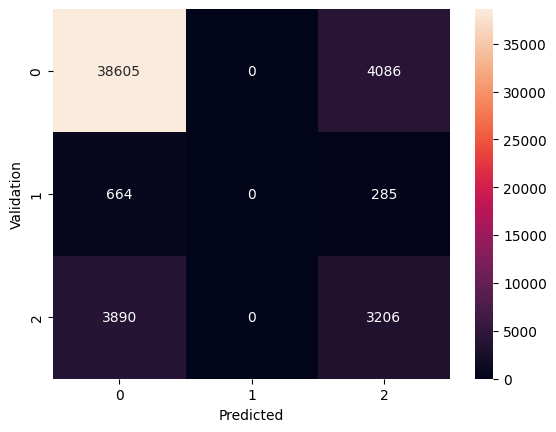

In [145]:
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Validation')
plt.show()

In [146]:
# Let's see how RF works with the under/over sampling
rf = RandomForestClassifier(n_estimators=100,max_depth=10, min_samples_leaf=10, random_state=1)
rf.fit(df_resampled, y_resampled)

RandomForestClassifier(max_depth=10, min_samples_leaf=10, random_state=1)

In [147]:
y_pred = rf.predict(df_new_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86     42691
           1       0.05      0.01      0.01       949
           2       0.35      0.64      0.45      7096

    accuracy                           0.77     50736
   macro avg       0.44      0.49      0.44     50736
weighted avg       0.82      0.77      0.79     50736



In [149]:
y_pred = rf.predict_proba(df_new_val)
y_val_bin = label_binarize(y_val, classes=[0, 1, 2])

auc_pr_w = average_precision_score(y_val_bin, y_pred, average="weighted")
auc_pr_m = average_precision_score(y_val_bin, y_pred, average="macro")

print(f"Weighted AUC-PR: {auc_pr_w.round(4)}")
print(f"Macro AUC-PR: {auc_pr_m.round(4)}")

Weighted AUC-PR: 0.8639
Macro AUC-PR: 0.4684


In [152]:
dtrain = lgb.Dataset(df_resampled, label=y_resampled)
dval = lgb.Dataset(df_new_val, label=y_val)

In [153]:
%%capture output

lgb_params = {
    'objective': 'multiclass',
    'num_class': 3, 
    'metric': 'multi_error',
    'learning_rate': 0.1,
    'max_depth': 10,
}

model = lgb.train(lgb_params, dtrain, valid_sets=[dval], num_boost_round=300)

In [154]:
y_pred = model.predict(df_new_val)
y_val_bin = label_binarize(y_val, classes=[0, 1, 2])

auc_pr_w = average_precision_score(y_val_bin, y_pred, average="weighted")
auc_pr_m = average_precision_score(y_val_bin, y_pred, average="macro")

print(f"Weighted AUC-PR: {auc_pr_w.round(4)}")
print(f"Macro AUC-PR: {auc_pr_m.round(4)}")

Weighted AUC-PR: 0.8649
Macro AUC-PR: 0.4688


In [155]:
model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.1,
    loss_function='MultiClass',
    verbose=0,
    depth=5
)

model.fit(df_resampled, y_resampled, eval_set=(df_new_val, y_val), early_stopping_rounds=10)

In [156]:
y_pred = model.predict_proba(df_new_val)
y_val_bin = label_binarize(y_val, classes=[0, 1, 2])

auc_pr_w = average_precision_score(y_val_bin, y_pred, average="weighted")
auc_pr_m = average_precision_score(y_val_bin, y_pred, average="macro")

print(f"Weighted AUC-PR: {auc_pr_w.round(4)}")
print(f"Macro AUC-PR: {auc_pr_m.round(4)}")

Weighted AUC-PR: 0.8648
Macro AUC-PR: 0.4705


In [157]:
y_pred = model.predict(df_new_val)
print(classification_report(y_val, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     42691
           1       0.00      0.00      0.00       949
           2       0.43      0.46      0.44      7096

    accuracy                           0.82     50736
   macro avg       0.44      0.46      0.45     50736
weighted avg       0.81      0.82      0.82     50736



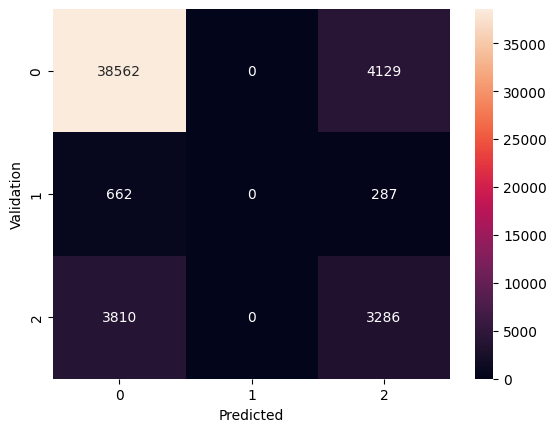

In [158]:
y_pred = model.predict(df_new_val)

cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Validation')
plt.show()

SMOTETomek + Weights (To adjust any imbalance)

In [293]:
weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_resampled),
    y=y_resampled
)

class_weights = {i: weights[i] for i in range(len(weights))}
print(f"Calculated weights: {class_weights}")

sample_weights = np.zeros(len(y_resampled))
for i, cls in enumerate(np.unique(y_resampled)):
    sample_weights[y_resampled == cls] = class_weights[cls]

Calculated weights: {0: 0.9983641134873511, 1: 1.000737768809846, 2: 1.0009021552645714}


In [294]:
dtrain = xgb.DMatrix(df_resampled, label=y_resampled, weight=sample_weights)
dval = xgb.DMatrix(df_new_val, label=y_val)

In [295]:
scores = {}

In [296]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 5,
    'min_child_weight': 10,
    'objective': 'multi:softprob',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    'num_class': 3,
    'eval_metric': 'merror'
}

model = xgb.train(xgb_params, dtrain, evals= watchlist, evals_result=scores,
                    verbose_eval=5, num_boost_round=500)

In [297]:
df_results = pd.DataFrame({
    'num_iter': range(len(scores['train']['merror'])),
    'train_merror': scores['train']['merror'],
    'val_merror': scores['val']['merror']
})

In [298]:
df_results["train_auc"] = 1 - df_results.train_merror
df_results["val_auc"] = 1 - df_results.val_merror

df_results.sort_values(by="val_auc", ascending=False)

,num_iter,train_merror,val_merror,train_auc,val_auc
499,499,0.172748,0.173900,0.827252,0.826100
498,498,0.172886,0.173900,0.827114,0.826100
497,497,0.172938,0.173900,0.827062,0.826100
492,492,0.173191,0.173940,0.826809,0.826060
495,495,0.173034,0.173979,0.826966,0.826021
...,...,...,...,...,...
15,15,0.345488,0.233385,0.654512,0.766615
13,13,0.351508,0.233404,0.648492,0.766596
8,8,0.360224,0.233582,0.639776,0.766418
24,24,0.327773,0.233838,0.672227,0.766162


In [299]:
y_pred = model.predict(dval)
y_pred = y_pred.argmax(axis=1) 

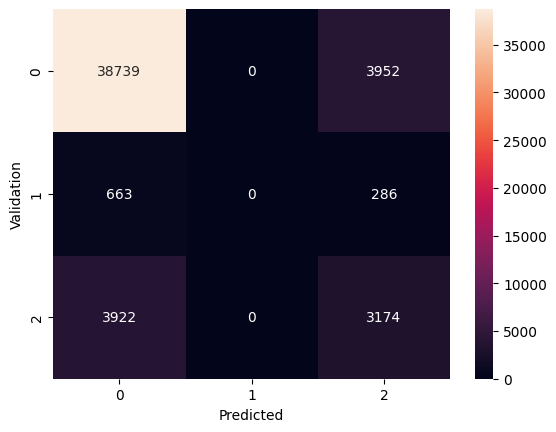

In [300]:
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Validation')
plt.show()

SMOTEENN

In [301]:
resampler = SMOTEENN(random_state=1, n_jobs=-1)
df_resampled, y_resampled = resampler.fit_resample(df_new_train, y_train)
df_resampled = pd.DataFrame(df_resampled, columns=df_new_train.columns)

c:\Users\tomas\anaconda3\lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [302]:
dtrain = xgb.DMatrix(df_resampled, label=y_resampled)
dval = xgb.DMatrix(df_new_val, label=y_val)

In [303]:
scores = {}

In [319]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 5,
    'min_child_weight': 10,
    'objective': 'multi:softprob',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    'num_class': 3,
    'eval_metric': 'merror'
}

model = xgb.train(xgb_params, dtrain, evals= watchlist, evals_result=scores,
                    verbose_eval=5, num_boost_round=500)

In [320]:
df_results = pd.DataFrame({
    'num_iter': range(len(scores['train']['merror'])),
    'train_merror': scores['train']['merror'],
    'val_merror': scores['val']['merror']
})

In [321]:
df_results["train_auc"] = 1 - df_results.train_merror
df_results["val_auc"] = 1 - df_results.val_merror

df_results.sort_values(by="val_auc", ascending=False)

,num_iter,train_merror,val_merror,train_auc,val_auc
499,499,0.210841,0.210363,0.789159,0.789637
498,498,0.210940,0.210363,0.789060,0.789637
490,490,0.211380,0.210363,0.788620,0.789637
497,497,0.210984,0.210383,0.789016,0.789617
492,492,0.211208,0.210383,0.788792,0.789617
...,...,...,...,...,...
4,4,0.400053,0.349614,0.599947,0.650386
6,6,0.393535,0.352018,0.606465,0.647982
1,1,0.408837,0.355566,0.591163,0.644434
3,3,0.404023,0.358286,0.595977,0.641714


In [322]:
y_pred = model.predict(dval)
y_pred = y_pred.argmax(axis=1) 

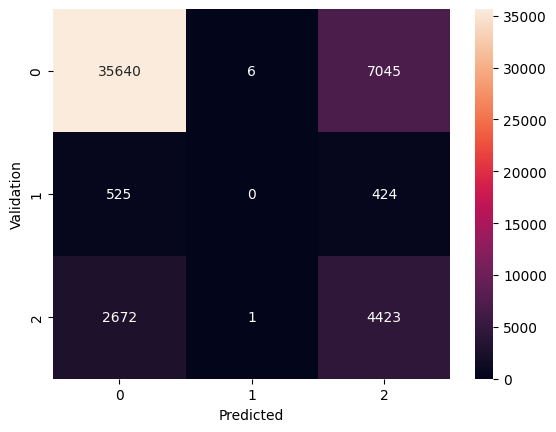

In [323]:
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Validation')
plt.show()

Random Forest + Weights

In [48]:
weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weights = {i: weights[i] for i in range(len(weights))}
print(f"Calculated weights: {class_weights}")

class_weights[1] = 5
print(f"Calculated weights: {class_weights}")

sample_weights = np.zeros(len(y_train))
for i, cls in enumerate(np.unique(y_train)):
    sample_weights[y_train == cls] = class_weights[cls]

Calculated weights: {0: 0.3957134166315691, 1: 18.06194375222499, 2: 2.394902053339627}
Calculated weights: {0: 0.3957134166315691, 1: 5, 2: 2.394902053339627}


In [49]:
# Best RF model for this dataset
rf = RandomForestClassifier(n_estimators=100,max_depth=10, min_samples_leaf=10, random_state=1)
rf.fit(df_new_train, y_train, sample_weight=sample_weights)

RandomForestClassifier(max_depth=10, min_samples_leaf=10, random_state=1)

In [50]:
y_pred = rf.predict(df_new_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.73      0.82     42691
           1       0.00      0.00      0.00       949
           2       0.31      0.79      0.45      7096

    accuracy                           0.72     50736
   macro avg       0.42      0.50      0.42     50736
weighted avg       0.84      0.72      0.75     50736



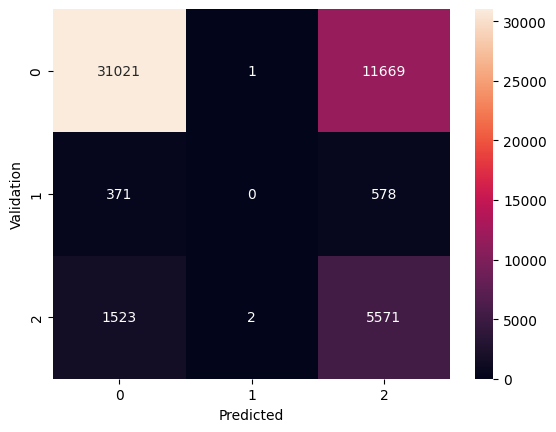

In [51]:
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Validation')
plt.show()

In [52]:
y_pred = rf.predict_proba(df_new_val)
y_val_bin = label_binarize(y_val, classes=[0, 1, 2])

auc_pr_w = average_precision_score(y_val_bin, y_pred, average="weighted")
auc_pr_m = average_precision_score(y_val_bin, y_pred, average="macro")

print(f"Weighted AUC-PR: {auc_pr_w.round(4)}")
print(f"Macro AUC-PR: {auc_pr_m.round(4)}")

Weighted AUC-PR: 0.8686
Macro AUC-PR: 0.4738


Borderline SMOTE

In [103]:
resampler_bsmote = BorderlineSMOTE(random_state=1, n_jobs=-1)
df_resampled, y_resampled = resampler_bsmote.fit_resample(df_new_train, y_train)
df_resampled = pd.DataFrame(df_resampled, columns=df_new_train.columns)

dtrain = lgb.Dataset(df_resampled, label=y_resampled)
dval = lgb.Dataset(df_new_val, label=y_val)

watchlist = [(dtrain, 'train'), (dval, 'val')]

c:\Users\tomas\anaconda3\lib\site-packages\imblearn\over_sampling\_smote\filter.py:197: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [119]:
model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    loss_function='MultiClass',
    verbose=10,
    depth=10,
    eval_metric= 'TotalF1'
)

model.fit(df_resampled, y_resampled, eval_set=(df_new_val, y_val), early_stopping_rounds=10)

0:	learn: 0.6019469	test: 0.7840632	best: 0.7840632 (0)	total: 184ms	remaining: 1m 31s
10:	learn: 0.6433272	test: 0.7848514	best: 0.7848514 (10)	total: 2.05s	remaining: 1m 31s
20:	learn: 0.6866758	test: 0.7870190	best: 0.7876699 (19)	total: 3.86s	remaining: 1m 28s
30:	learn: 0.7056343	test: 0.7925565	best: 0.7925565 (30)	total: 5.66s	remaining: 1m 25s
40:	learn: 0.7240299	test: 0.7969012	best: 0.7969012 (40)	total: 7.48s	remaining: 1m 23s
50:	learn: 0.7386577	test: 0.7997022	best: 0.7997022 (50)	total: 9.26s	remaining: 1m 21s
60:	learn: 0.7504962	test: 0.8011363	best: 0.8011363 (60)	total: 11s	remaining: 1m 19s
70:	learn: 0.7633734	test: 0.8032132	best: 0.8032132 (70)	total: 12.8s	remaining: 1m 17s
80:	learn: 0.7748365	test: 0.8049329	best: 0.8049329 (80)	total: 14.6s	remaining: 1m 15s
90:	learn: 0.7832225	test: 0.8063128	best: 0.8063128 (90)	total: 16.4s	remaining: 1m 13s
100:	learn: 0.7891774	test: 0.8081173	best: 0.8081173 (100)	total: 18.2s	remaining: 1m 11s
110:	learn: 0.7963667	t

In [120]:
y_pred = model.predict_proba(df_new_val)
y_val_bin = label_binarize(y_val, classes=[0, 1, 2])

auc_pr_w = average_precision_score(y_val_bin, y_pred, average="weighted")
auc_pr_m = average_precision_score(y_val_bin, y_pred, average="macro")

print(f"Weighted AUC-PR: {auc_pr_w.round(4)}")
print(f"Macro AUC-PR: {auc_pr_m.round(4)}")

Weighted AUC-PR: 0.8633
Macro AUC-PR: 0.4667


In [121]:
y_pred = model.predict(df_new_val)
print(classification_report(y_val, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     42691
           1       0.00      0.00      0.00       949
           2       0.42      0.46      0.44      7096

    accuracy                           0.82     50736
   macro avg       0.44      0.45      0.44     50736
weighted avg       0.81      0.82      0.82     50736



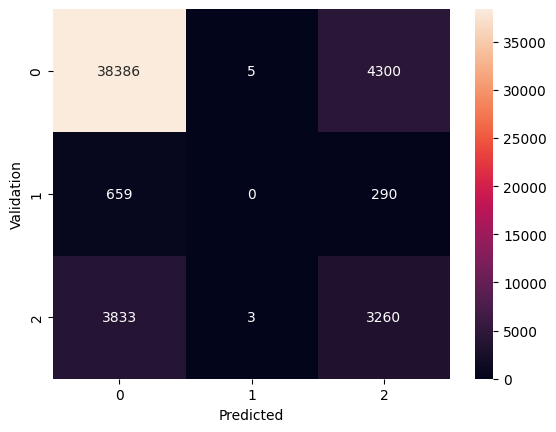

In [122]:
y_pred = model.predict(df_new_val)

cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Validation')
plt.show()

ADASYN

In [123]:
resampler_adasyn = ADASYN(random_state=42, n_jobs=-1)
df_resampled, y_resampled = resampler_adasyn.fit_resample(df_new_train, y_train)
df_resampled = pd.DataFrame(df_resampled, columns=df_new_train.columns)

dtrain = lgb.Dataset(df_resampled, label=y_resampled)
dval = lgb.Dataset(df_new_val, label=y_val)

watchlist = [(dtrain, 'train'), (dval, 'val')]

c:\Users\tomas\anaconda3\lib\site-packages\imblearn\over_sampling\_adasyn.py:156: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [124]:
model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    loss_function='MultiClass',
    verbose=10,
    depth=10,
    eval_metric= 'TotalF1'
)

model.fit(df_resampled, y_resampled, eval_set=(df_new_val, y_val), early_stopping_rounds=10)

0:	learn: 0.5952346	test: 0.7841373	best: 0.7841373 (0)	total: 185ms	remaining: 1m 32s
10:	learn: 0.6380821	test: 0.7880248	best: 0.7880248 (10)	total: 2.06s	remaining: 1m 31s
20:	learn: 0.6716638	test: 0.7914001	best: 0.7914001 (20)	total: 3.86s	remaining: 1m 28s
30:	learn: 0.6946890	test: 0.7952896	best: 0.7952896 (30)	total: 5.67s	remaining: 1m 25s
40:	learn: 0.7109726	test: 0.7983503	best: 0.7983503 (40)	total: 7.5s	remaining: 1m 23s
50:	learn: 0.7277195	test: 0.8023435	best: 0.8023435 (50)	total: 9.4s	remaining: 1m 22s
60:	learn: 0.7405807	test: 0.8049169	best: 0.8049169 (60)	total: 11.3s	remaining: 1m 21s
70:	learn: 0.7525082	test: 0.8077842	best: 0.8077842 (70)	total: 13.1s	remaining: 1m 19s
80:	learn: 0.7618936	test: 0.8098143	best: 0.8098143 (80)	total: 14.9s	remaining: 1m 17s
90:	learn: 0.7699830	test: 0.8113965	best: 0.8113965 (90)	total: 16.8s	remaining: 1m 15s
100:	learn: 0.7763952	test: 0.8123419	best: 0.8124117 (99)	total: 18.7s	remaining: 1m 13s
110:	learn: 0.7832939	te

In [125]:
y_pred = model.predict_proba(df_new_val)
y_val_bin = label_binarize(y_val, classes=[0, 1, 2])

auc_pr_w = average_precision_score(y_val_bin, y_pred, average="weighted")
auc_pr_m = average_precision_score(y_val_bin, y_pred, average="macro")

print(f"Weighted AUC-PR: {auc_pr_w.round(4)}")
print(f"Macro AUC-PR: {auc_pr_m.round(4)}")

Weighted AUC-PR: 0.8641
Macro AUC-PR: 0.4684


In [126]:
y_pred = model.predict(df_new_val)
print(classification_report(y_val, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90     42691
           1       0.00      0.00      0.00       949
           2       0.44      0.41      0.42      7096

    accuracy                           0.83     50736
   macro avg       0.44      0.44      0.44     50736
weighted avg       0.81      0.83      0.82     50736



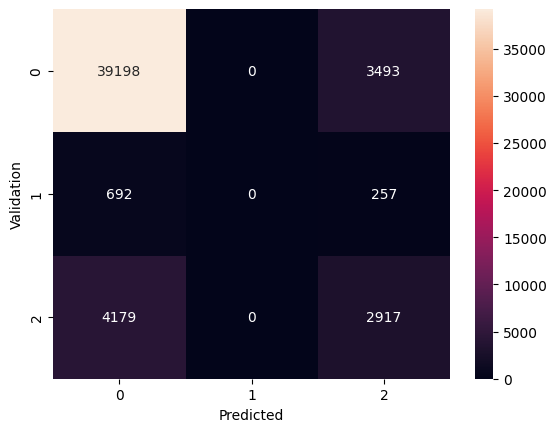

In [127]:
y_pred = model.predict(df_new_val)

cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Validation')
plt.show()

Testing CatBoost Model with df_test

In [27]:
y_full_train = df_full_train.diabetes_012.values
del df_full_train['diabetes_012']

In [28]:
resampler_bsmote = BorderlineSMOTE(random_state=1, n_jobs=-1)
df_resampled, y_resampled = resampler_bsmote.fit_resample(df_new_train, y_train)
df_resampled = pd.DataFrame(df_resampled, columns=df_new_train.columns)

dtrain = lgb.Dataset(df_resampled, label=y_resampled)
dval = lgb.Dataset(df_new_val, label=y_val)

watchlist = [(dtrain, 'train'), (dval, 'val')]

c:\Users\tomas\anaconda3\lib\site-packages\imblearn\over_sampling\_smote\filter.py:197: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [29]:
model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    loss_function='MultiClass',
    verbose=10,
    depth=10,
    eval_metric= 'TotalF1'
)

model.fit(df_resampled, y_resampled, eval_set=(df_new_val, y_val), early_stopping_rounds=10)

0:	learn: 0.6019469	test: 0.7840632	best: 0.7840632 (0)	total: 494ms	remaining: 4m 6s
10:	learn: 0.6433272	test: 0.7848514	best: 0.7848514 (10)	total: 3.28s	remaining: 2m 26s
20:	learn: 0.6866758	test: 0.7870190	best: 0.7876699 (19)	total: 6.05s	remaining: 2m 18s
30:	learn: 0.7056343	test: 0.7925565	best: 0.7925565 (30)	total: 8.78s	remaining: 2m 12s
40:	learn: 0.7240299	test: 0.7969012	best: 0.7969012 (40)	total: 11.4s	remaining: 2m 8s
50:	learn: 0.7386577	test: 0.7997022	best: 0.7997022 (50)	total: 13.9s	remaining: 2m 2s
60:	learn: 0.7504962	test: 0.8011363	best: 0.8011363 (60)	total: 16.4s	remaining: 1m 57s
70:	learn: 0.7633734	test: 0.8032132	best: 0.8032132 (70)	total: 18.9s	remaining: 1m 54s
80:	learn: 0.7748365	test: 0.8049329	best: 0.8049329 (80)	total: 21.6s	remaining: 1m 51s
90:	learn: 0.7832225	test: 0.8063128	best: 0.8063128 (90)	total: 24.2s	remaining: 1m 48s
100:	learn: 0.7891774	test: 0.8081173	best: 0.8081173 (100)	total: 26.8s	remaining: 1m 45s
110:	learn: 0.7963667	te

In [30]:
y_pred = model.predict_proba(df_test)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

auc_pr_w = average_precision_score(y_test_bin, y_pred, average="weighted")
auc_pr_m = average_precision_score(y_test_bin, y_pred, average="macro")

print(f"Weighted AUC-PR: {auc_pr_w.round(4)}")
print(f"Macro AUC-PR: {auc_pr_m.round(4)}")

Weighted AUC-PR: 0.8627
Macro AUC-PR: 0.4603


In [31]:
y_pred = model.predict(df_test)
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     42798
           1       0.05      0.00      0.00       873
           2       0.41      0.45      0.43      7065

    accuracy                           0.82     50736
   macro avg       0.45      0.45      0.44     50736
weighted avg       0.81      0.82      0.82     50736



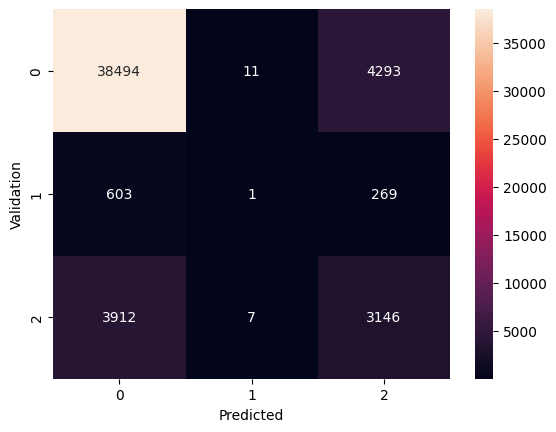

In [32]:
y_pred = model.predict(df_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Validation')
plt.show()

In [33]:
model.save_model("cat_boost_model_borderlinesmote.cbm")

In [34]:
resampler_adasyn = ADASYN(random_state=42, n_jobs=-1)
df_resampled, y_resampled = resampler_adasyn.fit_resample(df_new_train, y_train)
df_resampled = pd.DataFrame(df_resampled, columns=df_new_train.columns)

dtrain = lgb.Dataset(df_resampled, label=y_resampled)
dval = lgb.Dataset(df_new_val, label=y_val)

watchlist = [(dtrain, 'train'), (dval, 'val')]

c:\Users\tomas\anaconda3\lib\site-packages\imblearn\over_sampling\_adasyn.py:156: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [35]:
model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    loss_function='MultiClass',
    verbose=10,
    depth=10,
    eval_metric= 'TotalF1'
)

model.fit(df_resampled, y_resampled, eval_set=(df_new_val, y_val), early_stopping_rounds=10)

0:	learn: 0.5952346	test: 0.7841373	best: 0.7841373 (0)	total: 320ms	remaining: 2m 39s
10:	learn: 0.6380821	test: 0.7880248	best: 0.7880248 (10)	total: 2.96s	remaining: 2m 11s
20:	learn: 0.6716638	test: 0.7914001	best: 0.7914001 (20)	total: 5.72s	remaining: 2m 10s
30:	learn: 0.6946890	test: 0.7952896	best: 0.7952896 (30)	total: 8.46s	remaining: 2m 8s
40:	learn: 0.7109726	test: 0.7983503	best: 0.7983503 (40)	total: 11s	remaining: 2m 3s
50:	learn: 0.7277195	test: 0.8023435	best: 0.8023435 (50)	total: 13.7s	remaining: 2m
60:	learn: 0.7405807	test: 0.8049169	best: 0.8049169 (60)	total: 16.5s	remaining: 1m 58s
70:	learn: 0.7525082	test: 0.8077842	best: 0.8077842 (70)	total: 19.1s	remaining: 1m 55s
80:	learn: 0.7618936	test: 0.8098143	best: 0.8098143 (80)	total: 21.7s	remaining: 1m 52s
90:	learn: 0.7699830	test: 0.8113965	best: 0.8113965 (90)	total: 24.5s	remaining: 1m 50s
100:	learn: 0.7763952	test: 0.8123419	best: 0.8124117 (99)	total: 27s	remaining: 1m 46s
110:	learn: 0.7832939	test: 0.81

In [36]:
y_pred = model.predict_proba(df_test)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

auc_pr_w = average_precision_score(y_test_bin, y_pred, average="weighted")
auc_pr_m = average_precision_score(y_test_bin, y_pred, average="macro")

print(f"Weighted AUC-PR: {auc_pr_w.round(4)}")
print(f"Macro AUC-PR: {auc_pr_m.round(4)}")

Weighted AUC-PR: 0.8638
Macro AUC-PR: 0.4625


In [37]:
y_pred = model.predict(df_test)
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90     42798
           1       0.00      0.00      0.00       873
           2       0.43      0.40      0.41      7065

    accuracy                           0.83     50736
   macro avg       0.44      0.44      0.44     50736
weighted avg       0.81      0.83      0.82     50736



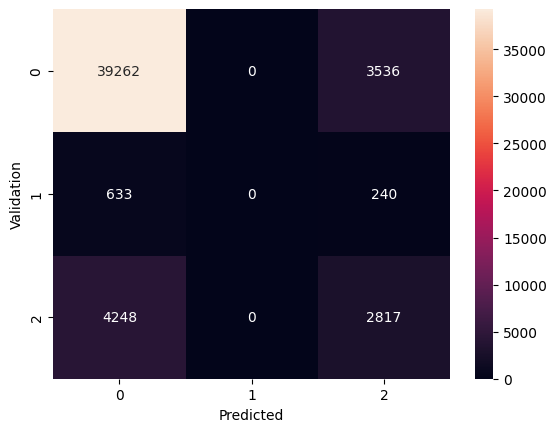

In [38]:
y_pred = model.predict(df_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Validation')
plt.show()

In [39]:
model.save_model("cat_boost_model_adasyn.cbm")

BorderlineSMOTE and ADASYN seem to be the best techniques to resample the dataset. These techniques combined with the CatBoostClassifier() model with the selected hyperparameters gave us the best result we could obtain.

It can be seen from the recall that more than 90% (even +92%) of the non-diabetics (class 0) were correctly matched while the recall of the diabetics (class 2) improved although the hit rate is still poor. In the case of pre-diabetics (class 1) no hits are achieved and by modifying the weights of the class to achieve these hits, the recall of the other classes worsens noticeably.

Another way of tackling the problem could be to segment the dataset into non-diabetics and pre-diabetics + diabetics, and then try to classify between pre-diabetics and diabetics, although I don't think the results would improve.